In [1]:
from common import *

In [2]:
from pandas_datareader import data,wb

In [3]:
guozhai = pd.read_csv('../data/000012.csv', encoding='gbk')
hs300 = pd.read_csv('../data/000300.csv', encoding='gbk')

In [4]:
guozhai.head(2)

日期     股票代码    名称       收盘价       最高价       最低价       开盘价  \
0  2021-01-15  '000012  国债指数  184.2401  184.2668  184.2232  184.2408   
1  2021-01-14  '000012  国债指数  184.2246  184.2980  184.2079  184.2587   

        前收盘     涨跌额     涨跌幅     成交量         成交金额  
0  184.2246  0.0155  0.0084  127760  121224658.0  
1  184.2425 -0.0179 -0.0097  277528  263245602.0

In [6]:
hs300.head(2)

日期     股票代码     名称        收盘价        最高价        最低价        开盘价  \
0  2021-01-15  '000300  沪深300  5458.0812  5500.6348  5390.2737  5471.3910   
1  2021-01-14  '000300  沪深300  5470.4563  5568.0179  5458.6818  5556.2125   

         前收盘        涨跌额      涨跌幅        成交量          成交金额  
0  5470.4563   -12.3751  -0.2262  238637435  4.757099e+11  
1  5577.9711  -107.5148  -1.9275  243683380  5.018901e+11

In [7]:
sp500 = pd.read_csv('../data/美国标准普尔500指数历史数据.csv')

In [8]:
sp500.head(2)

日期        收盘        开盘         高         低 交易量     涨跌幅
0  2021年1月19日  3,790.18  3,796.00  3,799.63  3,782.39   -   0.58%
1  2021年1月15日  3,768.25  3,788.73  3,788.73  3,749.62   -  -0.72%

In [9]:
def to_time_str(date):
    year_index = date.find('年')
    month_index= date.find('月')
    day_index = date.find('日')
    # print(year_index, month_index, day_index)
    year = int(date[0:year_index])
    month = int(date[year_index+1:month_index])
    day = int(date[month_index+1:day_index])
    date = datetime.datetime(year, month, day).strftime('%Y-%m-%d')
    return date

sp500['date'] = sp500['日期'].apply(to_time_str)

In [10]:
sp500.head(2)

日期        收盘        开盘         高         低 交易量     涨跌幅        date
0  2021年1月19日  3,790.18  3,796.00  3,799.63  3,782.39   -   0.58%  2021-01-19
1  2021年1月15日  3,768.25  3,788.73  3,788.73  3,749.62   -  -0.72%  2021-01-15

In [11]:
guozhai.set_index('日期', inplace=True)

In [12]:
guozhai.sort_index(inplace=True)

In [13]:
guozhai.head(1)

股票代码    名称      收盘价      最高价      最低价      开盘价     前收盘    涨跌额  \
日期                                                                             
2003-02-24  '000012  国债指数  100.668  100.676  100.635  100.672  100.64  0.024   

               涨跌幅      成交量          成交金额  
日期                                         
2003-02-24  0.0278  1612000  1.672104e+09

In [14]:
hs300.set_index('日期', inplace=True)
hs300.sort_index(inplace=True)
hs300.head(1)

股票代码     名称      收盘价      最高价      最低价      开盘价   前收盘   涨跌额  \
日期                                                                           
2002-01-04  '000300  沪深300  1316.46  1316.46  1316.46  1316.46  None  None   

             涨跌幅  成交量  成交金额  
日期                           
2002-01-04  None    0   0.0

In [15]:
sp500 = sp500.set_index('date').sort_index()
sp500.head(1)

日期        收盘        开盘         高         低 交易量    涨跌幅
date                                                                    
2006-01-04  2006年1月4日  1,273.46  1,268.80  1,275.37  1,267.74   -  0.37%

In [16]:
print(get_annual_return(guozhai.收盘价.values))
print(get_max_drawdown(guozhai.收盘价.values))
print(get_mar(guozhai.收盘价.values))

0.035321878608422175
0.10423436779013733
0.338869792730343


In [17]:
print(get_annual_return(hs300.收盘价.values))
print(get_max_drawdown(hs300.收盘价.values))
print(get_mar(hs300.收盘价.values))

0.0799947954016329
0.723038445845489
0.11063698737083136


In [18]:
def to_number(num):
    return float(num.replace(',', ''))
close = sp500.收盘[(sp500.index > '2009-01-31') & (sp500.index<'2017-11-31')].map(to_number).values
print(get_annual_return(close))
print(get_max_drawdown(close))
print(get_mar(close))

0.13991459046620824
0.2222809780546966
0.6294492299371632


In [19]:
sp500['close'] = sp500.收盘.map(to_number)

In [20]:
sp500.head(1)

日期        收盘        开盘         高         低 交易量    涨跌幅  \
date                                                                       
2006-01-04  2006年1月4日  1,273.46  1,268.80  1,275.37  1,267.74   -  0.37%   

              close  
date                 
2006-01-04  1273.46

In [21]:
total = pd.concat([guozhai.收盘价.rename('国债'), hs300.收盘价.rename('沪深300'), sp500.close.rename('标普500')], axis = 1)

In [22]:
total.sort_index(inplace=True)

In [23]:
total.tail()

国债      沪深300    标普500
2021-01-12  184.1756  5596.3525  3801.19
2021-01-13  184.2425  5577.9711  3809.84
2021-01-14  184.2246  5470.4563  3795.54
2021-01-15  184.2401  5458.0812  3768.25
2021-01-19       NaN        NaN  3790.18

In [24]:
total = total.dropna()

In [25]:
total.head()

国债    沪深300    标普500
2006-01-04  109.187  941.428  1273.46
2006-01-05  109.339  959.134  1273.48
2006-01-06  109.553  970.032  1285.45
2006-01-09  109.628  975.253  1290.15
2006-01-10  109.729  978.154  1289.69

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C11DC3CC0>,
      dtype=object)

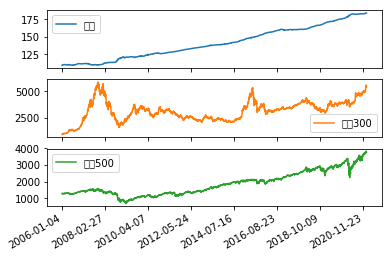

In [26]:
total.plot(subplots=True)

In [28]:

# 等权重部署 不调仓位
s_pnl = np.array([])
s_weight = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0])

for i in np.arange(0, total.shape[0]):
    if i == 0:
        s_pnl = np.append(s_pnl, 1)
        continue
    else:
        y_md = total.values[i-1, ]
        t_md = total.values[i, ]
        t_return = t_md / y_md
        
        s_weight = s_weight * t_return
        s_pnl = np.append(s_pnl, s_weight.sum())


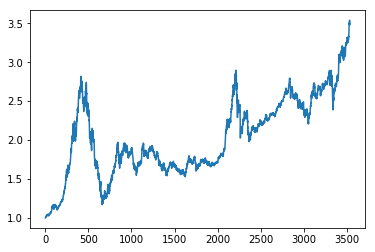

In [29]:
plt.plot(s_pnl)

In [30]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.09217350458180218
0.5850656832108341
0.15754385742803267


In [33]:

# 等权重部署 按月调仓
s_pnl = np.array([])
s_weight = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0])

def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

for i in np.arange(0, total.shape[0]):
    if i == 0:
        s_pnl = np.append(s_pnl, 1)
        continue
    else:
        y_md = total.values[i-1, ]
        t_md = total.values[i, ]
        t_return = t_md / y_md
        
        s_weight = s_weight * t_return
        s_pnl = np.append(s_pnl, s_weight.sum())
    
    yd = total.index[i-1]
    td = total.index[i]
    if is_balance_day(td, yd):
        cur_pnl = s_pnl[-1]
        s_weight = np.array([cur_pnl/3.0, cur_pnl/3.0, cur_pnl/3.0])

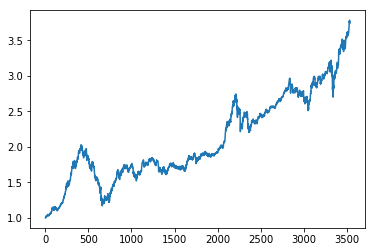

In [36]:
plt.plot(s_pnl)

In [37]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.09769276146682482
0.42338663993734843
0.23074124748310698


In [38]:
from portfolioHelper import *

ModuleNotFoundError: No module named 'helper'

In [27]:
def calc_portfolio_risk_contribution(weights, covmat):
    """
    Compute the contributions to risk of the constituents of a portfolio, given a set of portfolio weights and a covariance matrix
    """
    total_portfolio_var = calc_portfolio_vol(weights, covmat)**2
    # Marginal contribution of each constituent
    marginal_contrib = covmat@weights
    risk_contrib = np.multiply(marginal_contrib, weights.T)/total_portfolio_var
    return risk_contrib

def calc_target_risk_contributions_weights(target_risk, cov):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    n = cov.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def msd_risk(weights, target_risk, cov):
        """
        Returns the Mean Squared Difference in risk contributions
        between weights and target_risk
        """
        w_contribs = calc_portfolio_risk_contribution(weights, cov)
        return ((w_contribs-target_risk)**2).sum()
    
    weights = minimize(msd_risk, init_guess,
                       args=(target_risk, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

def calc_equal_risk_contributions_weights(cov):
    """
    Returns the weights of the portfolio that equalizes the contributions
    of the constituents based on the given covariance matrix
    """
    n = cov.shape[0]
    return calc_target_risk_contributions_weights(target_risk=np.repeat(1/n,n), cov=cov)

In [28]:
def calc_portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    vol = (weights.T @ covmat @ weights)**0.5
    return vol 

In [29]:
total.cov()

国债          沪深300          标普500
国债       505.146395    9540.072657   14572.001162
沪深300   9540.072657  866018.794634  354744.088188
标普500  14572.001162  354744.088188  495423.472499

In [32]:
calc_equal_risk_contributions_weights(total.cov().values)

array([0.94501289, 0.02594474, 0.02904237])

In [31]:
from scipy.optimize import minimize

In [72]:
# 等权重部署 按月调仓
s_pnl = np.array([])
s_weight = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0])

def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

for i in np.arange(0, total.shape[0]):
    if i == 0:
        s_pnl = np.append(s_pnl, 1)
        continue
    else:
        y_md = total.values[i-1, ]
        t_md = total.values[i, ]
        t_return = t_md / y_md
        
        s_weight = s_weight * t_return
        s_pnl = np.append(s_pnl, s_weight.sum())
    
    yd = total.index[i-1]
    td = total.index[i]
    if is_balance_day(td, yd):
        cur_pnl = s_pnl[-1]
        if i > 40:
            cov = total.iloc[i-35:i, ]
            weight = calc_equal_risk_contributions_weights(cov.cov().values)
            # print(weight)
            s_weight = np.array([cur_pnl*weight[0], cur_pnl*weight[1], cur_pnl*weight[2]])

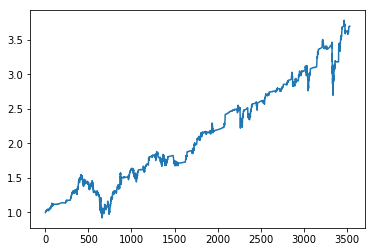

In [73]:
plt.plot(s_pnl)

In [74]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.09678643764520278
0.40403342765123346
0.23955056938692212


In [98]:
# 等权重部署 按月调仓

total1 = total.copy()
total1['cash'] = 1

s_pnl = np.array([])
s_weight = np.array([0, 0, 0, 1])

def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

for i in np.arange(0, total.shape[0]):
    if i == 0:
        s_pnl = np.append(s_pnl, 1)
        continue
    else:
        y_md = total1.values[i-1, ]
        t_md = total1.values[i, ]
        t_return = t_md / y_md
        
        s_weight = s_weight * t_return
        s_pnl = np.append(s_pnl, s_weight.sum())
    
    yd = total1.index[i-1]
    td = total1.index[i]
    if is_balance_day(td, yd):
        cur_pnl = s_pnl[-1]
        if i > 40:
            cov = total.iloc[i-35:i, 0:3]
            weight = calc_equal_risk_contributions_weights(cov.cov().values)
            
            zuhe_weight = 1
            s_std = np.std(s_pnl[i-35:i])
            # print(s_std)
            if np.abs(s_std) > 1e-6:
                zuhe_weight = 0.01 / s_std
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            zuhe_weight = zuhe_weight * cur_pnl
            print(zuhe_weight)
            # print(weight)
            s_weight = np.array([zuhe_weight*weight[0], zuhe_weight*weight[1], zuhe_weight*weight[2], cur_pnl-zuhe_weight])

1.0
0.801003687781925
0.5317118416543432
1.0623079769960073
1.0601334373503217
1.0660117808150626
1.0767408612045095
1.081149957269582
1.08421272631289
1.0831180333810366
0.9429690267707804
0.91812517245465
1.1162789354476885
0.3906660013649423
0.37535177598737873
1.2257220028295723
0.8288292319412507
0.3559271270663626
0.41601649439651006
1.3364336528026712
0.34391723993380174
0.8999157164893955
1.290251867127739
1.2496196751436222
0.4504347562311764
0.590063007407678
0.6383035449091582
0.6950561306421803
1.2031944736544338
0.694512201024088
0.2712361325961643
0.4457582007989608
1.068192591380781
0.3041924829442317
0.5079591504211292
0.6830193892042642
0.407272954611366
0.30479943158490436
0.9555980086968366
1.2867626585297351
0.4706749811569614
0.5992641508700928
0.44751319741597473
0.8376608320561075
1.4219001425334263
1.4230611934135011
1.4266640590965405
1.0665042950417196
0.400891576802561
1.4704753569195914
0.37756054314149995
0.4779047635719776
1.1298105190779841
1.151199590396

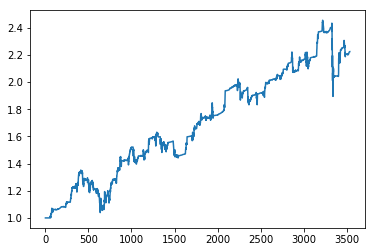

In [99]:
plt.plot(s_pnl)

In [100]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.05813735538546805
0.23058034200912514
0.25213491696168655


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001272FD33E10>,
      dtype=object)

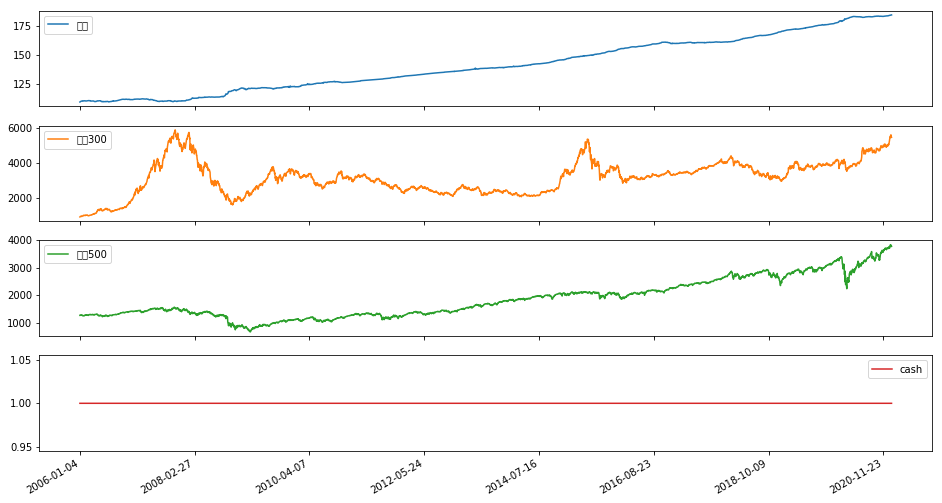

In [102]:
total1.plot(subplots=True, figsize=(16, 9))

In [188]:
# 等权重部署 按月调仓 控制组合年华波动率

total2 = total.copy()
total2['cash'] = 1

s_pnl = np.array([])
s_weight = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0, 0])

def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

for i in np.arange(0, total1.shape[0]):
    if i == 0:
        s_pnl = np.append(s_pnl, 1)
        continue
    else:
        y_md = total1.values[i-1, ]
        t_md = total1.values[i, ]
        t_return = t_md / y_md
        
        s_weight = s_weight * t_return
        s_pnl = np.append(s_pnl, s_weight.sum())
    
    yd = total.index[i-1]
    td = total.index[i]
    if is_balance_day(td, yd):
        cur_pnl = s_pnl[-1]
        
        zuhe_weight = 1
        if i > 45:
            s_std = np.std(s_pnl[i-35:i])
            year_vol = s_std * np.sqrt(250)
            if np.abs(year_vol) > 1e-6:
                zuhe_weight = 0.08 / year_vol
            if zuhe_weight > 1.0:
                zuhe_weight = 1.0
        zuhe_weight = zuhe_weight * cur_pnl 
            
        s_weight = np.array([zuhe_weight/3.0, zuhe_weight/3.0, zuhe_weight/3.0, cur_pnl - zuhe_weight])

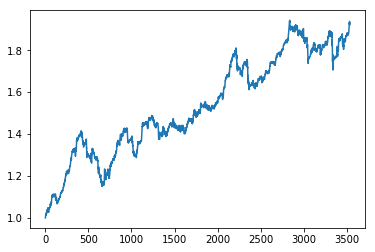

In [189]:
plt.plot(s_pnl)

In [190]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.0472483669082997
0.18801907035289164
0.25129560964012626


国债      沪深300    标普500  cash
2006-01-04  109.1870   941.4280  1273.46     1
2006-01-05  109.3390   959.1340  1273.48     1
2006-01-06  109.5530   970.0320  1285.45     1
2006-01-09  109.6280   975.2530  1290.15     1
2006-01-10  109.7290   978.1540  1289.69     1
...              ...        ...      ...   ...
2021-01-11  184.0559  5441.1583  3799.61     1
2021-01-12  184.1756  5596.3525  3801.19     1
2021-01-13  184.2425  5577.9711  3809.84     1
2021-01-14  184.2246  5470.4563  3795.54     1
2021-01-15  184.2401  5458.0812  3768.25     1

[3537 rows x 4 columns]

In [115]:
ag = pd.read_csv('../data/600489.csv', encoding = 'gbk')

In [117]:
ag = ag.set_index('日期').sort_index()

In [131]:
for_assert = pd.concat([total.国债, total.沪深300, total.标普500, ag.收盘价.rename('黄金')], axis=1)

In [132]:
four_assert = for_assert.sort_index()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000127318682B0>,
      dtype=object)

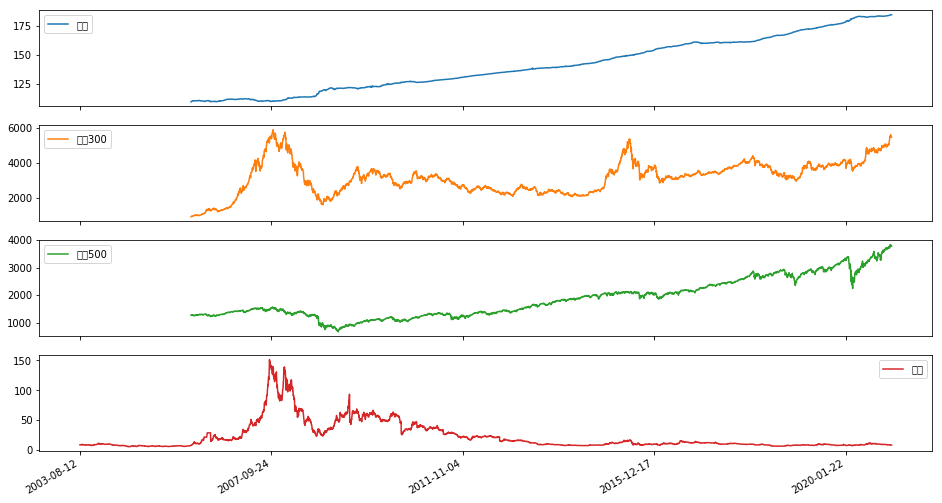

In [137]:
four_assert.plot(subplots=True, figsize=(16, 9))

In [134]:
four_assert.黄金[four_assert.黄金 == 0] = np.nan

In [136]:
four_assert.fillna(method='ffill', inplace=True)

In [138]:
four_assert = four_assert.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000127322806A0>,
      dtype=object)

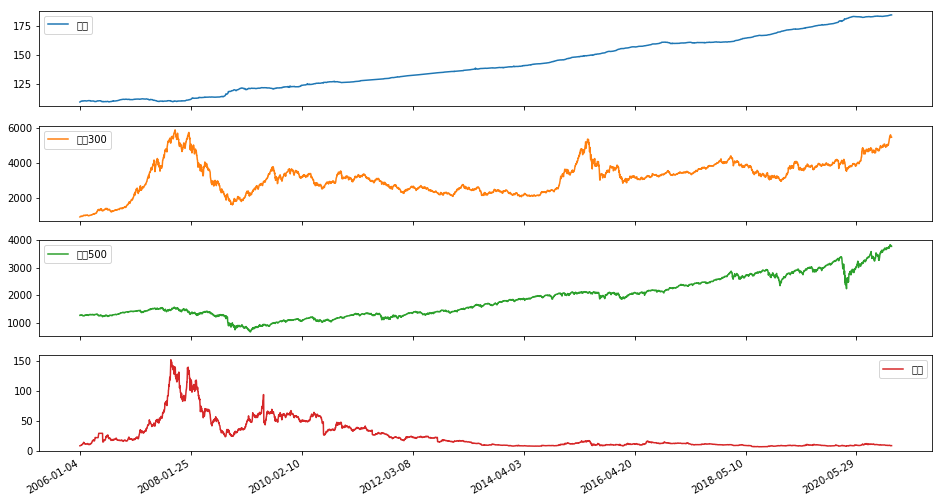

In [140]:
four_assert.plot(subplots=True, figsize=(16, 9))

In [160]:
total.head()

国债    沪深300    标普500
2006-01-04  109.187  941.428  1273.46
2006-01-05  109.339  959.134  1273.48
2006-01-06  109.553  970.032  1285.45
2006-01-09  109.628  975.253  1290.15
2006-01-10  109.729  978.154  1289.69

In [35]:
au = pd.read_csv('../data/黄金期货历史数据.csv')

In [36]:
au.head()

日期        收盘        开盘         高         低      交易量    涨跌幅
0  2020年7月27日  1,955.40  1,929.00  1,971.30  1,926.80  137.85K  1.57%
1  2020年7月24日  1,925.20  1,912.30  1,933.60  1,908.00   66.45K  0.41%
2  2020年7月23日  1,917.40  1,900.00  1,927.10  1,890.40   72.36K  1.31%
3  2020年7月22日  1,892.60  1,867.80  1,899.00  1,867.80   49.86K  1.23%
4  2020年7月21日  1,869.60  1,842.50  1,870.50  1,839.90   31.69K  1.60%

In [37]:
au['date'] = au.日期.apply(to_time_str)

In [38]:
au['close'] = au.收盘.apply(to_number)

In [39]:
au.head()

日期        收盘        开盘         高         低      交易量    涨跌幅  \
0  2020年7月27日  1,955.40  1,929.00  1,971.30  1,926.80  137.85K  1.57%   
1  2020年7月24日  1,925.20  1,912.30  1,933.60  1,908.00   66.45K  0.41%   
2  2020年7月23日  1,917.40  1,900.00  1,927.10  1,890.40   72.36K  1.31%   
3  2020年7月22日  1,892.60  1,867.80  1,899.00  1,867.80   49.86K  1.23%   
4  2020年7月21日  1,869.60  1,842.50  1,870.50  1,839.90   31.69K  1.60%   

         date   close  
0  2020-07-27  1955.4  
1  2020-07-24  1925.2  
2  2020-07-23  1917.4  
3  2020-07-22  1892.6  
4  2020-07-21  1869.6

In [40]:
au = au.set_index('date')

In [41]:
au.head()

日期        收盘        开盘         高         低      交易量  \
date                                                                      
2020-07-27  2020年7月27日  1,955.40  1,929.00  1,971.30  1,926.80  137.85K   
2020-07-24  2020年7月24日  1,925.20  1,912.30  1,933.60  1,908.00   66.45K   
2020-07-23  2020年7月23日  1,917.40  1,900.00  1,927.10  1,890.40   72.36K   
2020-07-22  2020年7月22日  1,892.60  1,867.80  1,899.00  1,867.80   49.86K   
2020-07-21  2020年7月21日  1,869.60  1,842.50  1,870.50  1,839.90   31.69K   

              涨跌幅   close  
date                       
2020-07-27  1.57%  1955.4  
2020-07-24  0.41%  1925.2  
2020-07-23  1.31%  1917.4  
2020-07-22  1.23%  1892.6  
2020-07-21  1.60%  1869.6

In [42]:
four_assert = pd.concat([total.国债, total.沪深300, total.标普500, au.close.rename('黄金')], axis=1)

In [43]:
four_assert = four_assert.sort_index()

In [44]:
four_assert = four_assert.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C15C3BCC0>,
      dtype=object)

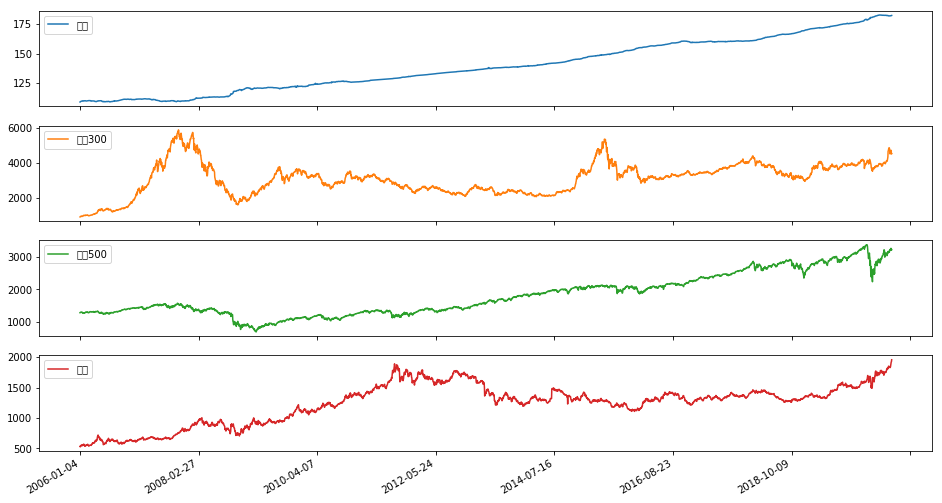

In [45]:
four_assert.plot(subplots=True, figsize=(16, 9))

In [46]:
# 等权重部署 按月调仓 控制组合年华波动率

total2 = four_assert.copy()
total2['cash'] = 1

s_pnl = np.array([])
s_weight = np.array([1.0/4.0, 1.0/4.0, 1.0/4.0, 1.0/4.0, 0])

def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

for i in np.arange(0, total2.shape[0]):
    if i == 0:
        s_pnl = np.append(s_pnl, 1)
        continue
    else:
        y_md = total2.values[i-1, ]
        t_md = total2.values[i, ]
        t_return = t_md / y_md
        
        s_weight = s_weight * t_return
        s_pnl = np.append(s_pnl, s_weight.sum())
    
    yd = total2.index[i-1]
    td = total2.index[i]
    if is_balance_day(td, yd):
        cur_pnl = s_pnl[-1]
        
        zuhe_weight = 1
        if i > 45:
            s_std = np.std(s_pnl[i-35:i])
            year_vol = s_std * np.sqrt(250)
            if np.abs(year_vol) > 1e-6:
                zuhe_weight = 0.08 / year_vol
            if zuhe_weight > 1.0:
                zuhe_weight = 1.0
        zuhe_weight = zuhe_weight * cur_pnl 
            
        s_weight = np.array([zuhe_weight/4.0, zuhe_weight/4.0, zuhe_weight/4.0, zuhe_weight/4.0, cur_pnl-zuhe_weight])

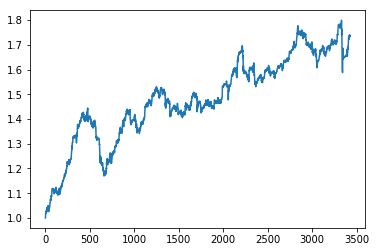

In [195]:
plt.plot(s_pnl)

In [196]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.04116765138836498
0.1905721261344736
0.216021367990174


In [47]:
def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

def equal_weight_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            zuhe_weight = 1
            if i > 45:
                s_std = np.std(s_pnl[i-35:i])
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            zuhe_weight = zuhe_weight * cur_pnl
            
            s_weight = np.array([zuhe_weight / col] * col)
            s_weight = np.append(s_weight, cur_pnl - zuhe_weight)
    return s_pnl

In [48]:
s_pnl = equal_weight_strategy(four_assert)

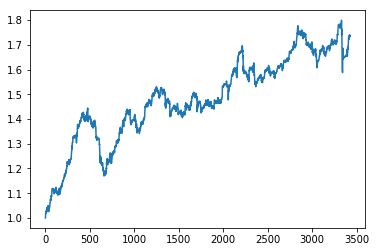

In [49]:
plt.plot(s_pnl)

In [50]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.04116765138836498
0.1905721261344736
0.216021367990174


In [51]:
s_pnl = equal_weight_strategy(total)

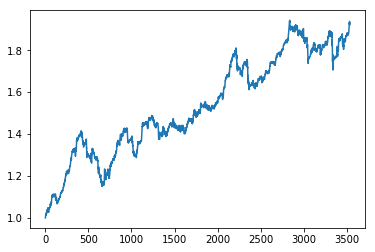

In [52]:
plt.plot(s_pnl)

In [53]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.0472483669082997
0.18801907035289164
0.25129560964012626


In [54]:
s_pnl = equal_weight_strategy(total.iloc[:, 0:2])

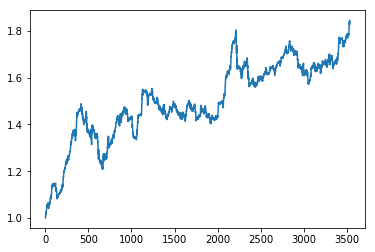

In [55]:
plt.plot(s_pnl)

In [56]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.0436717791297363
0.18842056516004027
0.23177819837575825


In [57]:
calc_equal_risk_contributions_weights(np.array([[1, 0.5], [0.5, 1]]))

array([0.5, 0.5])

In [230]:
def is_balance_day(today, yesterday):
    today = get_datetime_from_str(today).month
    yesterday = get_datetime_from_str(yesterday).month
    if today != yesterday:
        return True
    
    return False

def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(data1.iloc[i-period:i, 0:col].cov().values)
                risk_parity_weight = risk_weight / count
            zuhe_weight = 1
            if i > 90:
                s_std = np.std(s_pnl[i-35:i])
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            s_weight = np.append(s_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            # print(s_weight.round(2
            print(s_weight.round(2))
    return s_pnl

In [227]:
four_assert = four_assert.fillna(method='ffill')

In [235]:
s_pnl = risk_parity_strategy(four_assert.iloc[:, 0:4], 0.1)

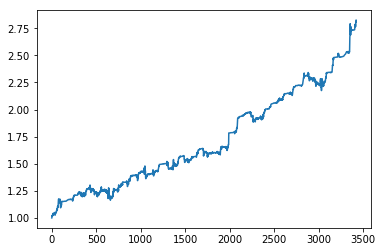

In [236]:
plt.plot(s_pnl)

In [237]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.07876759542051914
0.10723402883033656
0.7345391782784138


In [62]:
s_pnl = equal_weight_strategy(total)

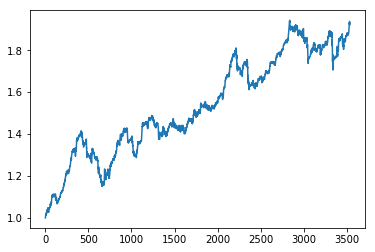

In [63]:
plt.plot(s_pnl)

In [64]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.0472483669082997
0.18801907035289164
0.25129560964012626


In [188]:
s_pnl = risk_parity_strategy(four_assert.iloc[:, 0:5], 0.1)

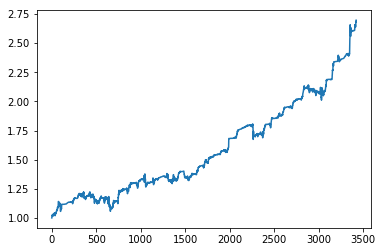

In [189]:
plt.plot(s_pnl)

In [191]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.07514146798981813
0.13507731875975765
0.5562848646963545


In [135]:
s_pnl = risk_parity_strategy(four_assert, 0.1)

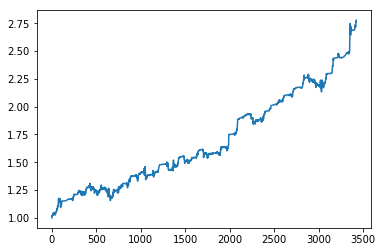

In [136]:
plt.plot(s_pnl)

In [137]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.07744294771377547
0.11903791179263316
0.6505738091968792


In [139]:
qqq = pd.read_csv('../data/纳斯达克综合指数历史数据.csv')

In [140]:
qqq.head()

日期         收盘         开盘          高          低      交易量     涨跌幅
0  2021年1月20日  13,423.44  13,343.09  13,425.42  13,330.48  357.32M   1.71%
1  2021年1月19日  13,197.18  13,132.73  13,206.86  13,078.70    1.22B   1.53%
2  2021年1月15日  12,998.50  13,099.89  13,139.83  12,949.76    1.26B  -0.87%
3  2021年1月14日  13,112.64  13,174.75  13,220.16  13,098.41    1.21B  -0.12%
4  2021年1月13日  13,128.95  13,088.01  13,171.15  13,051.07    1.27B   0.43%

In [142]:
qqq['date'] = qqq.日期.apply(to_time_str)

In [143]:
qqq['close'] = qqq.收盘.apply(to_number)

In [144]:
qqq = qqq.set_index('date')

In [145]:
qqq.head()

日期         收盘         开盘          高          低      交易量  \
date                                                                          
2021-01-20  2021年1月20日  13,423.44  13,343.09  13,425.42  13,330.48  357.32M   
2021-01-19  2021年1月19日  13,197.18  13,132.73  13,206.86  13,078.70    1.22B   
2021-01-15  2021年1月15日  12,998.50  13,099.89  13,139.83  12,949.76    1.26B   
2021-01-14  2021年1月14日  13,112.64  13,174.75  13,220.16  13,098.41    1.21B   
2021-01-13  2021年1月13日  13,128.95  13,088.01  13,171.15  13,051.07    1.27B   

               涨跌幅     close  
date                          
2021-01-20   1.71%  13423.44  
2021-01-19   1.53%  13197.18  
2021-01-15  -0.87%  12998.50  
2021-01-14  -0.12%  13112.64  
2021-01-13   0.43%  13128.95

In [146]:
four_assert.head()

国债    沪深300    标普500     黄金
2006-01-04  109.187  941.428  1273.46  533.9
2006-01-05  109.339  959.134  1273.48  526.3
2006-01-06  109.553  970.032  1285.45  539.7
2006-01-09  109.628  975.253  1290.15  549.1
2006-01-10  109.729  978.154  1289.69  544.3

In [147]:
four_assert['纳斯达克'] = qqq.close

In [148]:
four_assert.head()

国债    沪深300    标普500     黄金     纳斯达克
2006-01-04  109.187  941.428  1273.46  533.9  2263.46
2006-01-05  109.339  959.134  1273.48  526.3  2276.87
2006-01-06  109.553  970.032  1285.45  539.7  2305.62
2006-01-09  109.628  975.253  1290.15  549.1  2318.69
2006-01-10  109.729  978.154  1289.69  544.3  2320.32

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C18863828>,
      dtype=object)

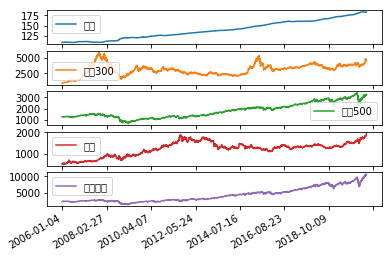

In [149]:
four_assert.plot(subplots=True)

In [150]:
s_pnl = risk_parity_strategy(four_assert, 0.10)

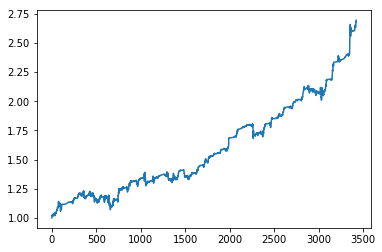

In [151]:
plt.plot(s_pnl)

In [152]:
print(get_annual_return(s_pnl))
print(get_max_drawdown(s_pnl))
print(get_mar(s_pnl))

0.0750881185628074
0.1306735170926887
0.5746238429439857


In [153]:
hensheng = pd.read_csv(r'../data/香港恒生指数历史数据.csv')

In [154]:
hensheng['date'] = hensheng.日期.apply(to_time_str)

In [155]:
hensheng['close'] = hensheng.收盘.apply(to_number)

In [158]:
hensheng = hensheng.set_index('date')

In [159]:
four_assert['hensheng'] = hensheng.close

In [160]:
four_assert.head()

国债    沪深300    标普500     黄金     纳斯达克  hensheng
2006-01-04  109.187  941.428  1273.46  533.9  2263.46  15200.06
2006-01-05  109.339  959.134  1273.48  526.3  2276.87  15271.13
2006-01-06  109.553  970.032  1285.45  539.7  2305.62  15344.44
2006-01-09  109.628  975.253  1290.15  549.1  2318.69  15547.43
2006-01-10  109.729  978.154  1289.69  544.3  2320.32  15569.91

In [172]:
s_pnl = risk_parity_strategy(four_assert.iloc[:, 0:3], 0.10)

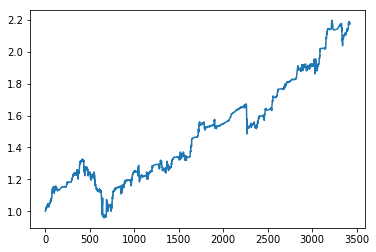

In [173]:
plt.plot(s_pnl)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C191C5EB8>,
      dtype=object)

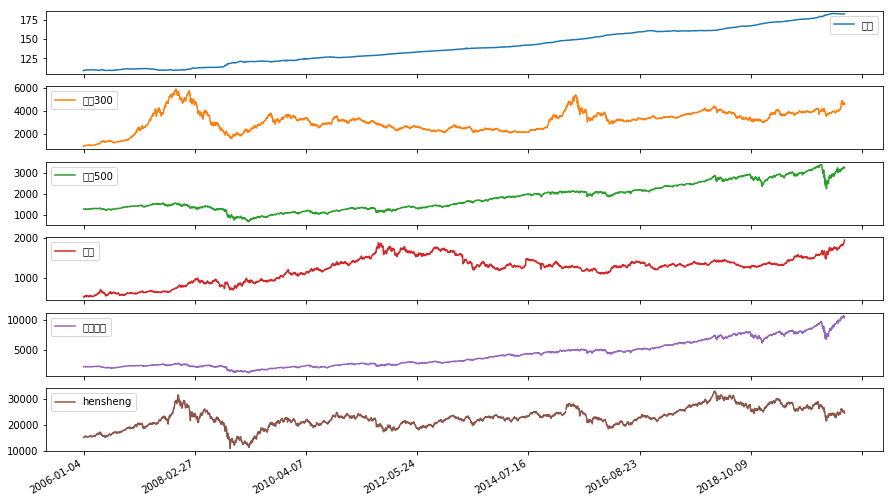

In [164]:
four_assert.plot(subplots=True, figsize=(15, 9))

In [170]:
four_assert.pct_change().cov()

国债         沪深300         标普500            黄金  \
国债        3.963796e-07 -5.471526e-07 -5.000954e-07  1.045967e-07   
沪深300    -5.471526e-07  3.178653e-04  2.960775e-05  1.003990e-05   
标普500    -5.000954e-07  2.960775e-05  1.739428e-04  6.696697e-06   
黄金        1.045967e-07  1.003990e-05  6.696697e-06  1.485556e-04   
纳斯达克     -3.848949e-07  3.312945e-05  1.788573e-04  5.965999e-06   
hensheng -5.672912e-07  1.416553e-04  5.621660e-05  1.076217e-05   

                  纳斯达克      hensheng  
国债       -3.848949e-07 -5.672912e-07  
沪深300     3.312945e-05  1.416553e-04  
标普500     1.788573e-04  5.621660e-05  
黄金        5.965999e-06  1.076217e-05  
纳斯达克      2.007555e-04  5.842129e-05  
hensheng  5.842129e-05  2.388106e-04

In [218]:
four_assert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3423 entries, 2006-01-04 to 2020-07-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   国债        3423 non-null   float64
 1   沪深300     3423 non-null   float64
 2   标普500     3423 non-null   float64
 3   黄金        3423 non-null   float64
 4   纳斯达克      3423 non-null   float64
 5   hensheng  3364 non-null   float64
dtypes: float64(6)
memory usage: 187.2+ KB


In [221]:
four_assert.fillna(method='ffill').info()

<class 'pandas.core.frame.DataFrame'>
Index: 3423 entries, 2006-01-04 to 2020-07-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   国债        3423 non-null   float64
 1   沪深300     3423 non-null   float64
 2   标普500     3423 non-null   float64
 3   黄金        3423 non-null   float64
 4   纳斯达克      3423 non-null   float64
 5   hensheng  3423 non-null   float64
dtypes: float64(6)
memory usage: 187.2+ KB


In [ ]:
plt.stackplot(four_assert.index, four_assert.values.T, labels=list(four_assert.columns))


In [84]:
from common import *
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
hs_300_etf = pd.read_csv('../data/159919_沪深300etf.csv')

In [3]:
guozhai_etf = pd.read_csv('../data/159926_国债etf.csv')

In [4]:
qqq_etf = pd.read_csv('../data/513100_纳斯达克etf.csv')

In [5]:
au_etf = pd.read_csv('../data/518880_黄金etf.csv')

In [6]:
def get_net_summary(data):
    data = data.set_index('净值日期').sort_index()
    return data

In [7]:
hs300_etf = get_net_summary(hs_300_etf)

In [8]:
guozhai_etf = get_net_summary(guozhai_etf)

In [9]:
qqq_etf = get_net_summary(qqq_etf)

In [10]:
au_etf = get_net_summary(au_etf)

In [11]:
total_assert = pd.concat([hs300_etf.累计净值.rename('沪深300'), 
                         guozhai_etf.累计净值.rename('国债'),
                         qqq_etf.累计净值.rename('纳斯达克'),
                         au_etf.累计净值.rename('黄金')], axis = 1).sort_index()

In [12]:
total_assert = total_assert.fillna(method='ffill')

In [13]:
s_pnl = equal_weight_strategy(total_assert)

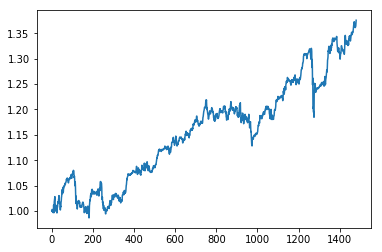

In [14]:
plt.plot(s_pnl)

In [15]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.05535487867442446, 0.10298612165650547, 0.5374984297306798)

In [69]:
s_pnl, weights = risk_parity_strategy(total_assert, 0.1)

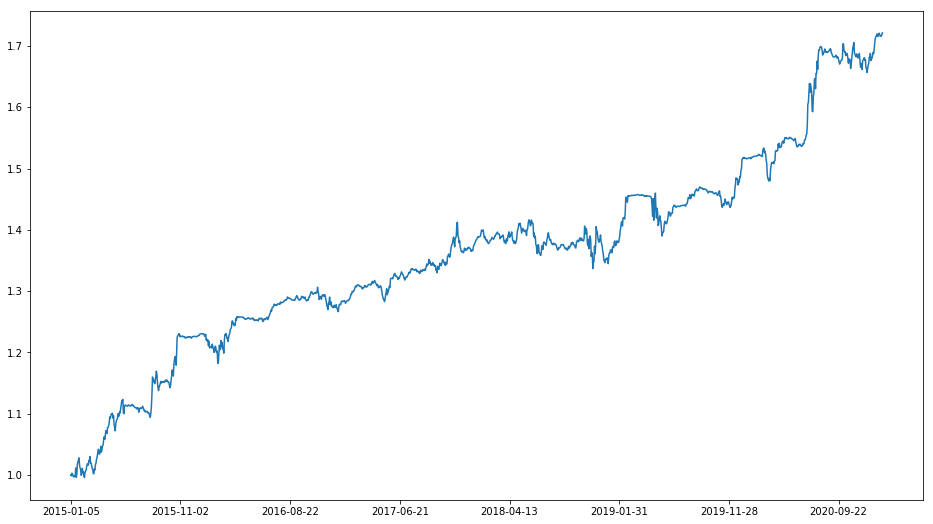

In [70]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(16, 9))

In [71]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.09602931653991531, 0.05591659660379401, 1.7173669781862155)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDEA71BAC8>,
      dtype=object)

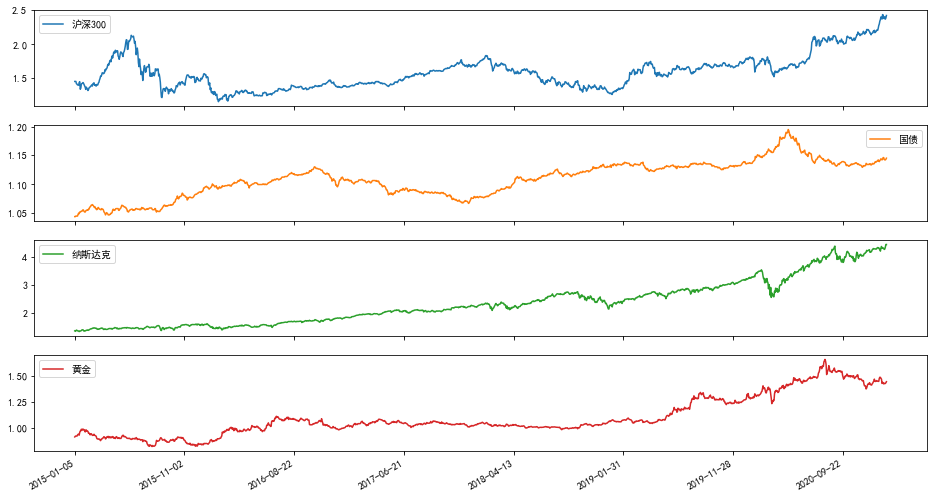

In [86]:
total_assert.plot(subplots=True, figsize=(16, 9))

In [80]:
total_assert.index.shape

(1481,)

In [81]:
weightsFrame = pd.DataFrame(np.array(weights)[ :, :], index = total_assert.index[1:, ])

In [82]:
weightsFrame.iloc[:, 4] = np.where(weightsFrame.iloc[:, 4] < 0, 0, weightsFrame.iloc[:, 4])

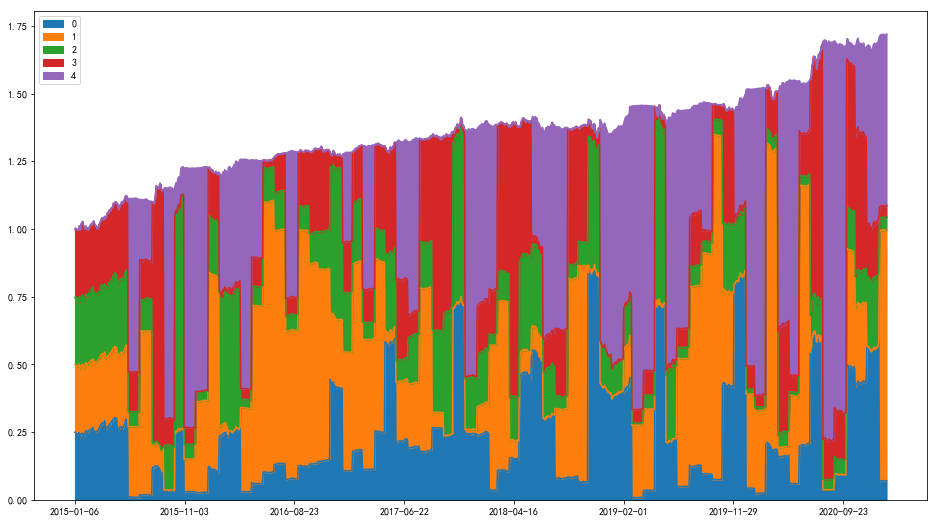

In [85]:
weightsFrame.plot.area(figsize=(16, 9))

In [90]:
count = 1
i = total_assert.shape[0]
col = 4
risk_weight = calc_equal_risk_contributions_weights(total_assert.iloc[i-30:i, 0:col].pct_change().cov().values)
for period in range(40, 70, 2):
    count = count + 1
    risk_weight = risk_weight + calc_equal_risk_contributions_weights(total_assert.iloc[i-period:i, 0:col].cov().values)
risk_parity_weight = risk_weight / count

In [91]:
risk_parity_weight

array([0.03834902, 0.77992574, 0.03964798, 0.14207726])

In [111]:
def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    weights = []
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(data1.iloc[i-period:i, 0:col].cov().values)
                risk_parity_weight = risk_weight / count
            zuhe_weight = 1
            
            if i > 90:
                # 计算组合年化波动率
                count = 1
                s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                    count += 1
                # print(s_std)
                s_std = s_std / count
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            s_weight = np.append(s_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            # print(s_weight.round(2))
        weights.append(s_weight)
    return s_pnl, weights

In [112]:
s_pnl, weights = risk_parity_strategy(total_assert, 0.1)

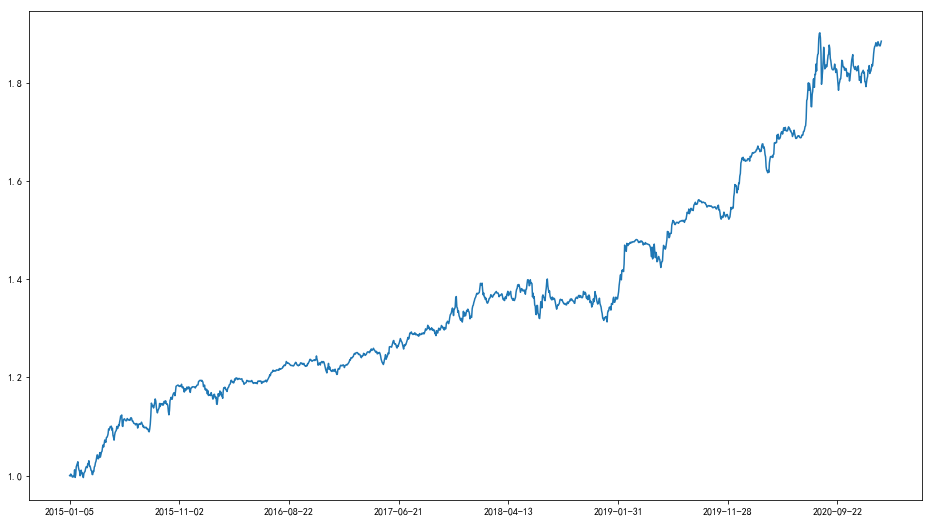

In [113]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(16, 9))

In [114]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.11299666030690747, 0.062481163303689344, 1.8084916210296507)

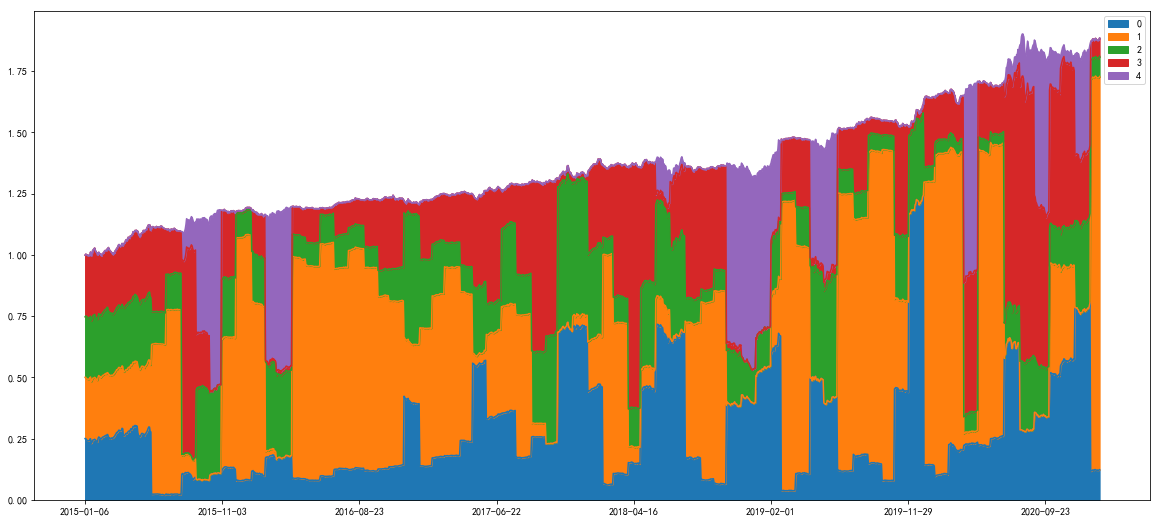

In [116]:
weightsFrame = pd.DataFrame(np.array(weights)[ :, :], index = total_assert.index[1:, ])
weightsFrame.iloc[:, 4] = np.where(weightsFrame.iloc[:, 4] < 0, 0, weightsFrame.iloc[:, 4])
weightsFrame.plot.area(figsize=(20, 9))

In [126]:
cur_pnl = 5000
i = total_assert.shape[0]
data1 = total_assert.copy()
target_year_vol = 0.1

risk_parity_weight = np.array([1.0/col] * col)

if i > 80:
    count = 1
    risk_weight = calc_equal_risk_contributions_weights(data1.iloc[i-30:i, 0:col].pct_change().cov().values)
    for period in range(40, 70, 2):
        count = count + 1
        risk_weight = risk_weight + calc_equal_risk_contributions_weights(data1.iloc[i-period:i, 0:col].cov().values)
    risk_parity_weight = risk_weight / count
zuhe_weight = 1

if i > 90:
    # 计算组合年化波动率
    count = 1
    s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
    for period in range(40, 70, 2):
        s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
        count += 1
    # print(s_std)
    s_std = s_std / count
    year_vol = s_std * np.sqrt(250)
    print(year_vol)
    if np.abs(year_vol) > 1e-6:
        zuhe_weight = target_year_vol / year_vol
    if zuhe_weight > 1.0:
        zuhe_weight = 1.0

new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())

0.028985803224098695


In [128]:
new_weight.round(2)

array([ 191.75, 3899.63,  198.24,  710.39,   -0.  ])

In [131]:
total_assert.head()

沪深300     国债   纳斯达克     黄金
2015-01-05  1.4501  1.043  1.357  0.913
2015-01-06  1.4498  1.043  1.341  0.920
2015-01-07  1.4506  1.044  1.358  0.922
2015-01-08  1.4167  1.044  1.384  0.921
2015-01-09  1.4118  1.044  1.375  0.921

In [132]:
total_assert.head()

沪深300     国债   纳斯达克     黄金
2015-01-05  1.4501  1.043  1.357  0.913
2015-01-06  1.4498  1.043  1.341  0.920
2015-01-07  1.4506  1.044  1.358  0.922
2015-01-08  1.4167  1.044  1.384  0.921
2015-01-09  1.4118  1.044  1.375  0.921

In [211]:
def simple_risk_parity_strategy(data, target_vol = 0.08):
    
    data_bk = data.copy()
    data_bk['cash'] = 1
    
    days = data_bk.shape[0]
    assert_size = data_bk.shape[1]
    history_weight = []
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/assert_size] * assert_size)
    
    for i in np.arange(days):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            s_weight = np.array([1.0/assert_size] * assert_size)
            continue
        else:
            y_md = data_bk.iloc[i-1, ].values
            t_md = data_bk.iloc[i, ].values
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            
            if i < 40:
                continue
            
            cur_pnl = s_pnl[-1]
            
            symbol_vol = data_bk.iloc[i-33:i, 0:assert_size-1].pct_change().std()*np.sqrt(250)
            symbol_weight = target_vol / (assert_size - 1) / symbol_vol
            if symbol_weight.sum() > 1.0:
                symbol_weight = symbol_weight / symbol_weight.sum()
            s_weight = cur_pnl * symbol_weight
            cash_weight = cur_pnl - s_weight.sum()
            if abs(cash_weight) < 1e-6:
                cash_weight = 0
            s_weight = np.append(s_weight, cash_weight)
            
        # print(len(s_weight))
        history_weight.append(s_weight)
    return s_pnl, history_weight
            
    

In [212]:
r, his_weight = simple_risk_parity_strategy(total_assert, 0.3)

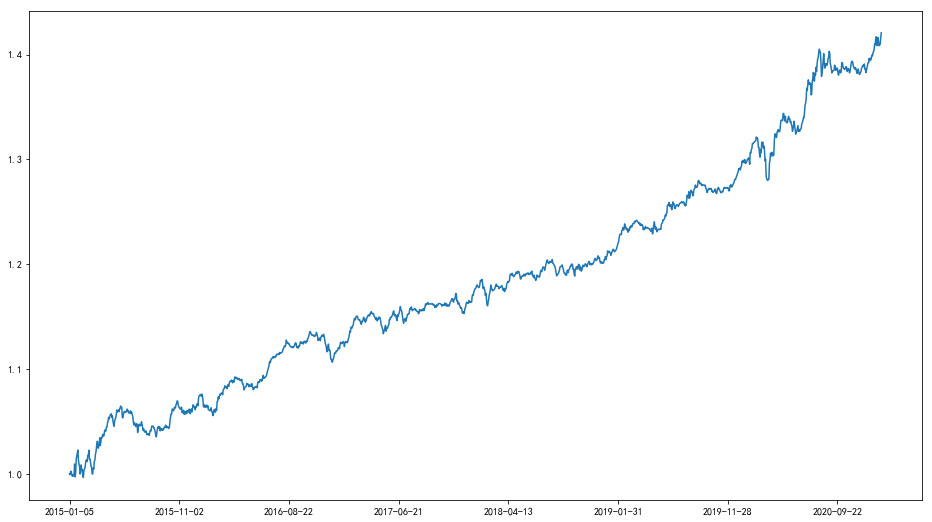

In [213]:
pd.Series(data = r, index = total_assert.index).plot(figsize=(16, 9))

In [214]:
(get_annual_return(r),
get_max_drawdown(r),
get_mar(r))

(0.06108272101523071, 0.03131164286736771, 1.950798981515267)

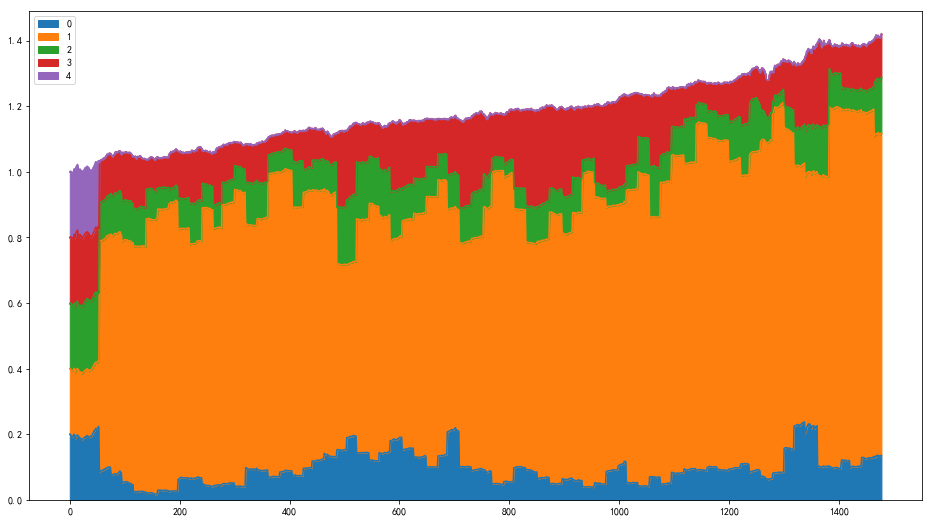

In [215]:
pd.DataFrame(his_weight).plot.area(figsize=(16, 9))

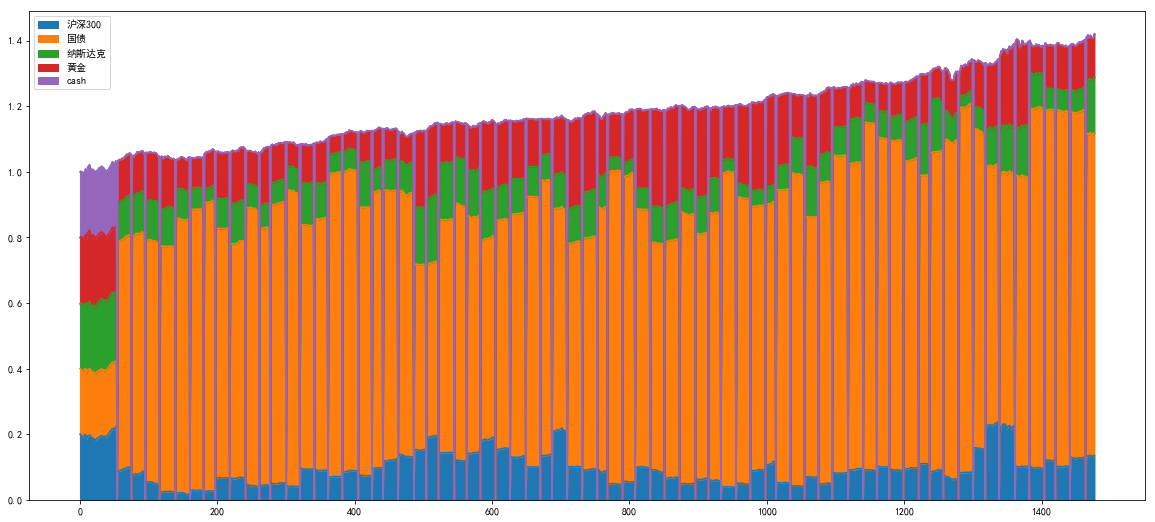

In [207]:
pd.DataFrame(his_weight).to_csv('temp.csv')

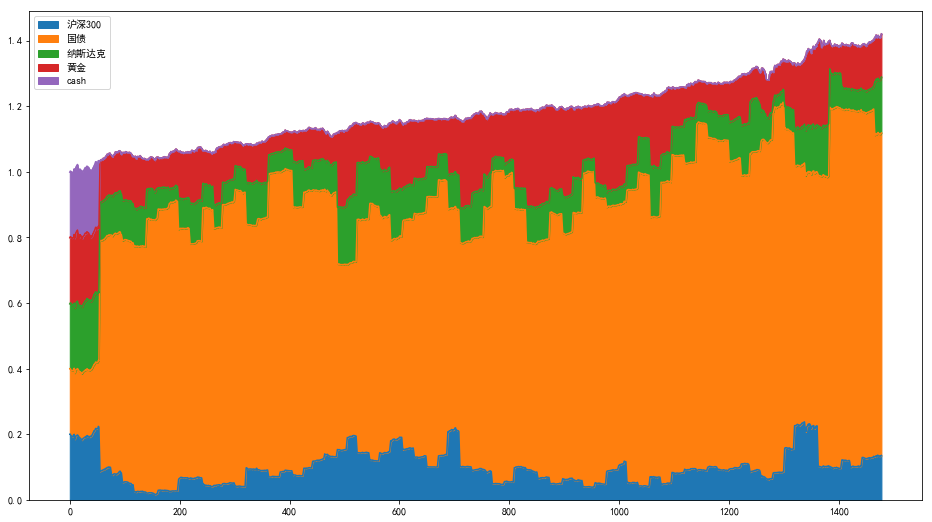

In [194]:
pd.DataFrame(his_weight).dropna().plot.area(figsize=(16, 9))

In [209]:
his_weight[1464]

array([0.12828194, 0.97867243, 0.1639339 , 0.13446769, 0.        ])

In [210]:
his_weight[1465]

沪深300    0.130656
国债       0.980391
纳斯达克     0.163742
黄金       0.135470
cash     0.000000
dtype: float64

In [217]:
def sample_cov(r, **kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def cc_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the Elton/Gruber Constant Correlation model
    """
    rhos = r.corr()
    n = rhos.shape[0]
    # this is a symmetric matrix with diagonals all 1 - so the mean correlation is ...
    rho_bar = (rhos.values.sum()-n)/(n*(n-1))
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = r.std()
    return pd.DataFrame(ccor * np.outer(sd, sd), index=r.columns, columns=r.columns)

def shrinkage_cov(r, delta=0.5, **kwargs):
    """
    Covariance estimator that shrinks between the Sample Covariance and the Constant Correlation Estimators
    """
    prior = cc_cov(r, **kwargs)
    sample = sample_cov(r, **kwargs)
    return delta*prior + (1-delta)*sample

In [263]:
def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    weights = []
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                risk_parity_weight = risk_weight / count
            zuhe_weight = 1
            
            if i > 90:
                # 计算组合年化波动率
                count = 1
                s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                    count += 1
                # print(s_std)
                s_std = s_std / count
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            cash_weight = cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum()
            if np.abs(cash_weight) < 1e-6:
                cash_weight = 0
            s_weight = np.append(s_weight, cash_weight)
            # print(s_weight.round(2))
        weights.append(s_weight)
    return s_pnl, weights

In [264]:
s_pnl, weights = risk_parity_strategy(total_assert)

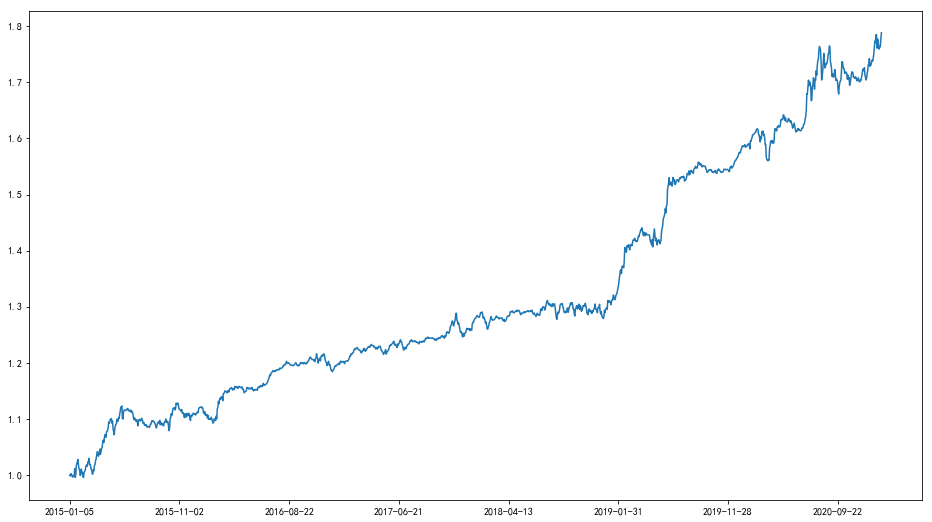

In [265]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(16, 9))

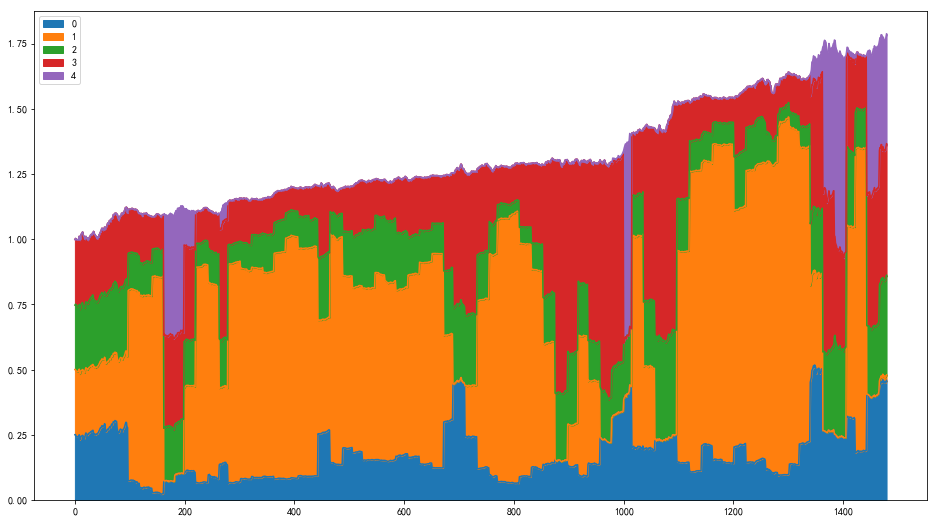

In [232]:
pd.DataFrame(weights).plot.area(figsize = (16, 9))

In [233]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.10306996009003999, 0.04846203094385255, 2.126818832860213)

In [234]:
def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    weights = []
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(cc_cov(data1.iloc[i-30:i, 0:col].pct_change()).values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(cc_cov(data1.iloc[i-period:i, 0:col].pct_change()).values)
                risk_parity_weight = risk_weight / count
            zuhe_weight = 1
            
            if i > 90:
                # 计算组合年化波动率
                count = 1
                s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                    count += 1
                # print(s_std)
                s_std = s_std / count
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            cash_weight = cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum()
            if np.abs(cash_weight) < 1e-6:
                cash_weight = 0
            s_weight = np.append(s_weight, cash_weight)
            # print(s_weight.round(2))
        weights.append(s_weight)
    return s_pnl, weights

In [235]:
s_pnl, weights = risk_parity_strategy(total_assert)

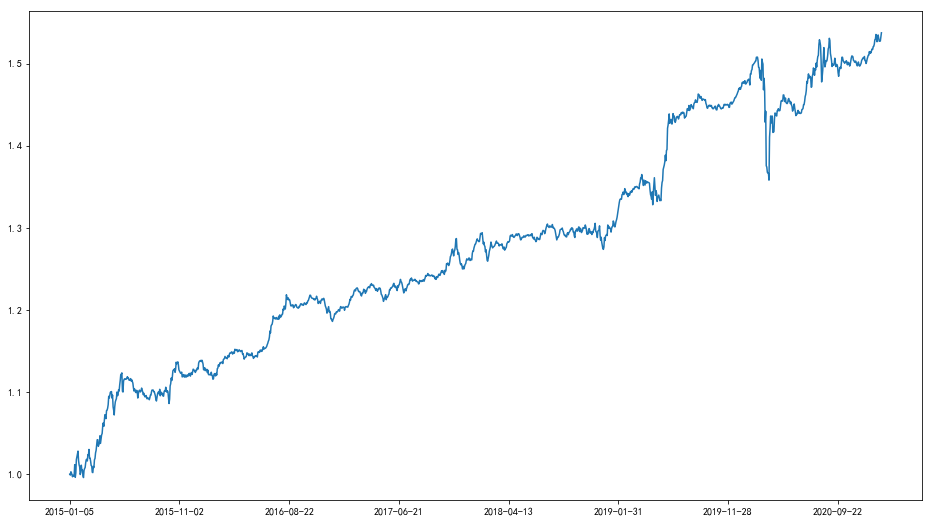

In [236]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(16, 9))

In [237]:
def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    weights = []
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(shrinkage_cov(data1.iloc[i-30:i, 0:col].pct_change()).values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(shrinkage_cov(data1.iloc[i-period:i, 0:col].pct_change()).values)
                risk_parity_weight = risk_weight / count
            zuhe_weight = 1
            
            if i > 90:
                # 计算组合年化波动率
                count = 1
                s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                    count += 1
                # print(s_std)
                s_std = s_std / count
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            cash_weight = cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum()
            if np.abs(cash_weight) < 1e-6:
                cash_weight = 0
            s_weight = np.append(s_weight, cash_weight)
            # print(s_weight.round(2))
        weights.append(s_weight)
    return s_pnl, weights

In [238]:
s_pnl, weights = risk_parity_strategy(total_assert)

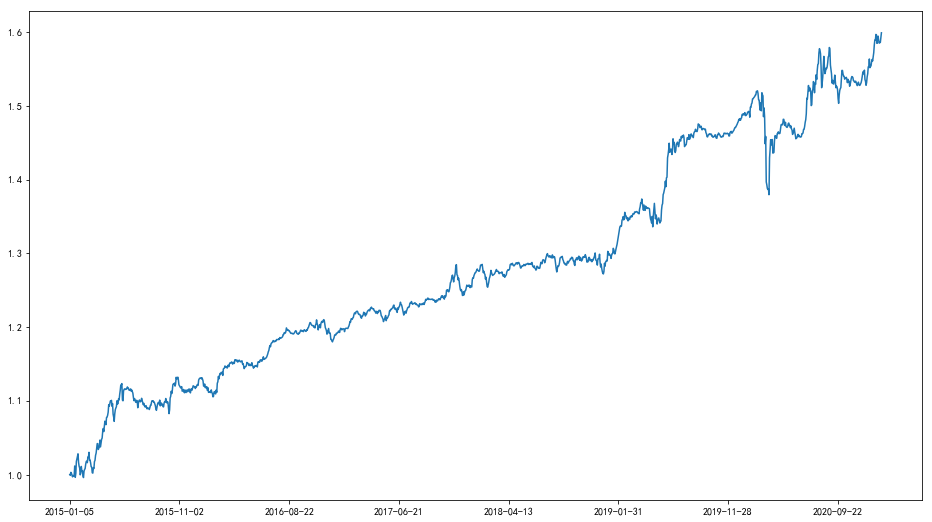

In [239]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(16, 9))

In [240]:
南方中债十年期国债C = pd.read_csv('../data/南方中债10年期国债C.csv')

In [241]:
南方中债十年期国债C.head()

净值日期    单位净值    累计净值    日增长率  申购状态  赎回状态  分红送配
0  2021-01-21  1.2731  1.3031   0.11%  开放申购  开放赎回   NaN
1  2021-01-20  1.2717  1.3017   0.07%  开放申购  开放赎回   NaN
2  2021-01-19  1.2708  1.3008   0.09%  开放申购  开放赎回   NaN
3  2021-01-18  1.2697  1.2997  -0.11%  开放申购  开放赎回   NaN
4  2021-01-15  1.2711  1.3011  -0.17%  开放申购  开放赎回   NaN

In [242]:
南方中债十年期国债C = 南方中债十年期国债C.set_index('净值日期').sort_index()

In [243]:
南方中债十年期国债C.head()

单位净值    累计净值    日增长率  申购状态  赎回状态  分红送配
净值日期                                                
2015-01-05  1.1070  1.1370   0.05%  开放申购  开放赎回   NaN
2015-01-06  1.1070  1.1370   0.00%  开放申购  开放赎回   NaN
2015-01-07  1.1077  1.1377   0.06%  开放申购  开放赎回   NaN
2015-01-08  1.1078  1.1378   0.01%  开放申购  开放赎回   NaN
2015-01-09  1.1074  1.1374  -0.04%  开放申购  开放赎回   NaN

In [244]:
(get_annual_return(南方中债十年期国债C.累计净值.values),
get_max_drawdown(南方中债十年期国债C.累计净值.values),
get_mar(南方中债十年期国债C.累计净值.values))

(0.023283955678168766, 0.05926952551769117, 0.39284869373922715)

In [246]:
(get_annual_return(total_assert.国债.values),
get_max_drawdown(total_assert.国债.values),
get_mar(total_assert.国债.values))

(0.015874764038383837, 0.05663716814159278, 0.2802888025527153)

In [247]:
total_assert.head()

沪深300     国债   纳斯达克     黄金
2015-01-05  1.4501  1.043  1.357  0.913
2015-01-06  1.4498  1.043  1.341  0.920
2015-01-07  1.4506  1.044  1.358  0.922
2015-01-08  1.4167  1.044  1.384  0.921
2015-01-09  1.4118  1.044  1.375  0.921

In [249]:
total_assert1 = pd.concat([total_assert.沪深300, 南方中债十年期国债C.累计净值.rename('南方中债'), total_assert.纳斯达克, total_assert.黄金], axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF25712B0>,
      dtype=object)

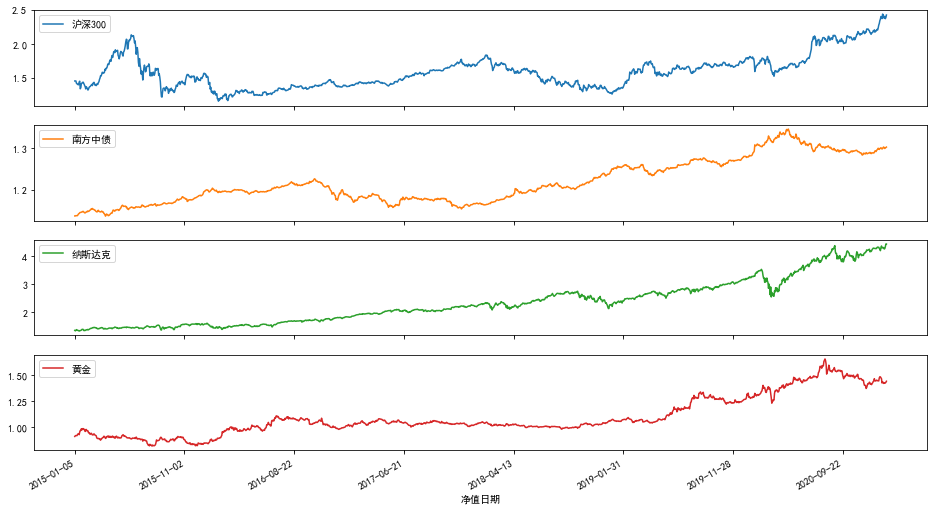

In [252]:
total_assert1.plot(subplots=True, figsize=(16, 9))

In [268]:
total_assert1.head()

沪深300    南方中债   纳斯达克     黄金
净值日期                                    
2015-01-05  1.4501  1.1370  1.357  0.913
2015-01-06  1.4498  1.1370  1.341  0.920
2015-01-07  1.4506  1.1377  1.358  0.922
2015-01-08  1.4167  1.1378  1.384  0.921
2015-01-09  1.4118  1.1374  1.375  0.921

In [269]:
s_pnl, weights = risk_parity_strategy(total_assert1)

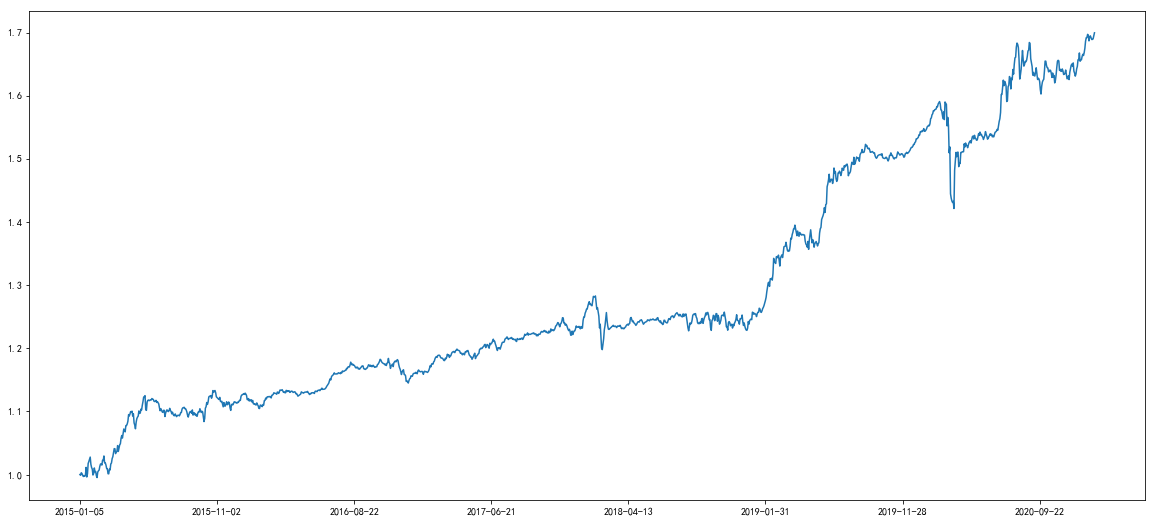

In [274]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(20, 9))

In [271]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.09366346110601609, 0.10647448682875331, 0.8796798547304422)

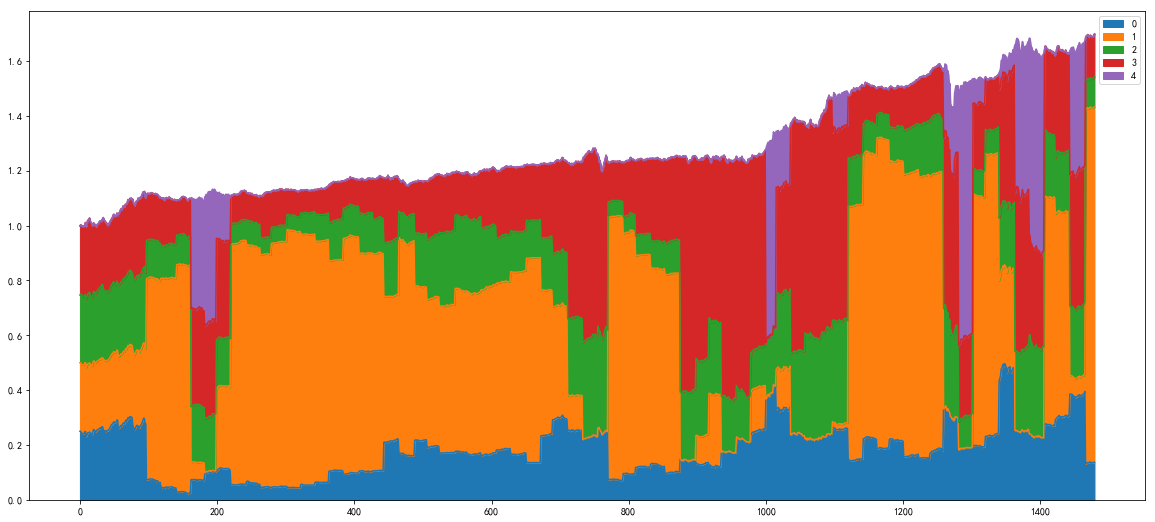

In [275]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [284]:
w = pd.DataFrame(weights)
w['pnl'] = s_pnl[1:]
w.to_csv('temp.csv')

In [283]:
(len(weights), len(s_pnl))

(1480, 1481)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF760D208>,
      dtype=object)

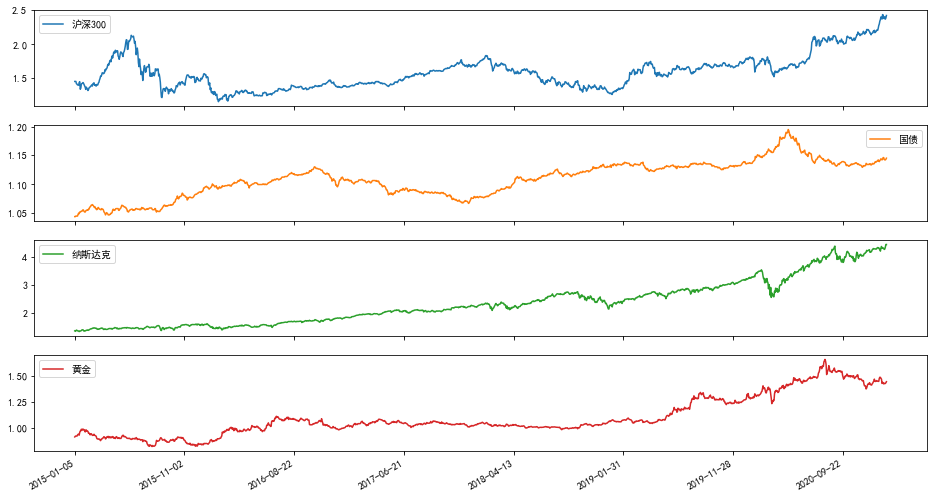

In [279]:
total_assert.plot(subplots=True, figsize=(16, 9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF86ADAC8>,
      dtype=object)

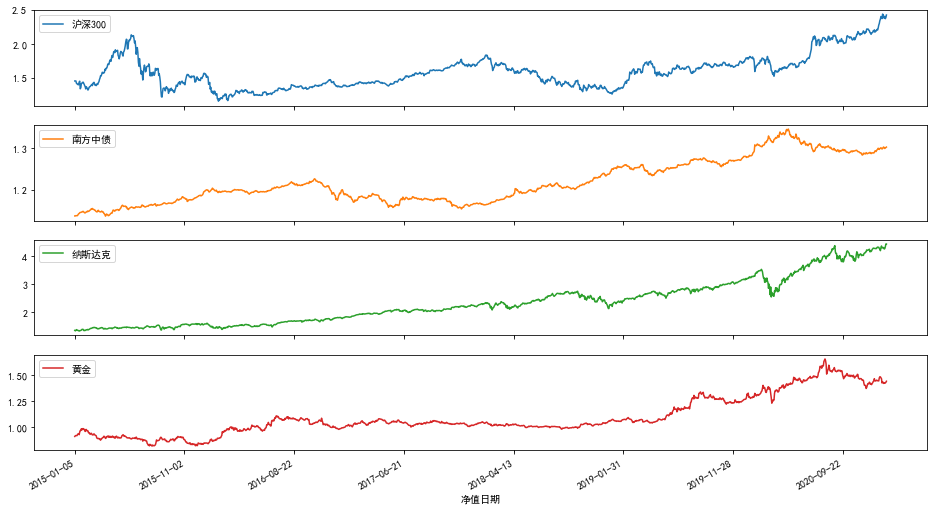

In [278]:
total_assert1.plot(subplots=True, figsize=(16, 9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDFC0A05C0>,
      dtype=object)

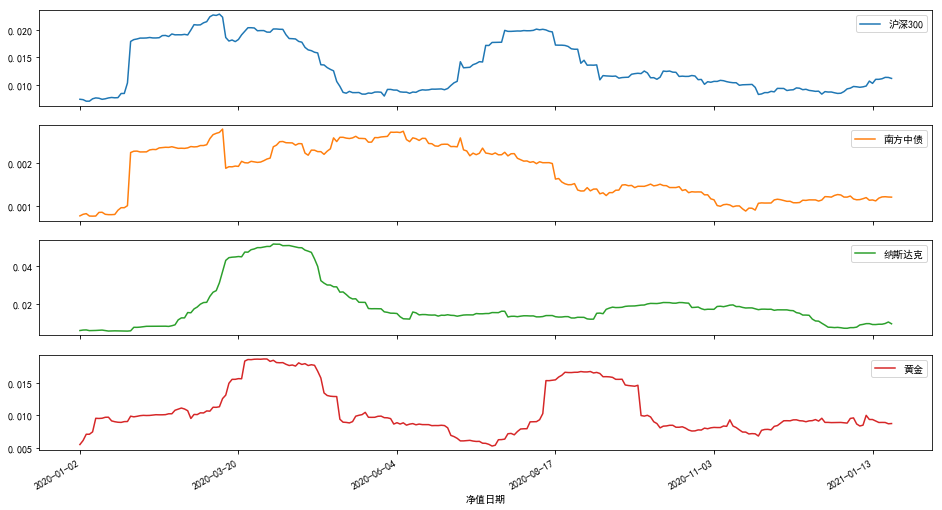

In [299]:
total_assert1.pct_change().rolling(30).std().loc[total_assert1.index>'2020-01-01'].plot(figsize=(16, 9), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDFBE5E438>,
      dtype=object)

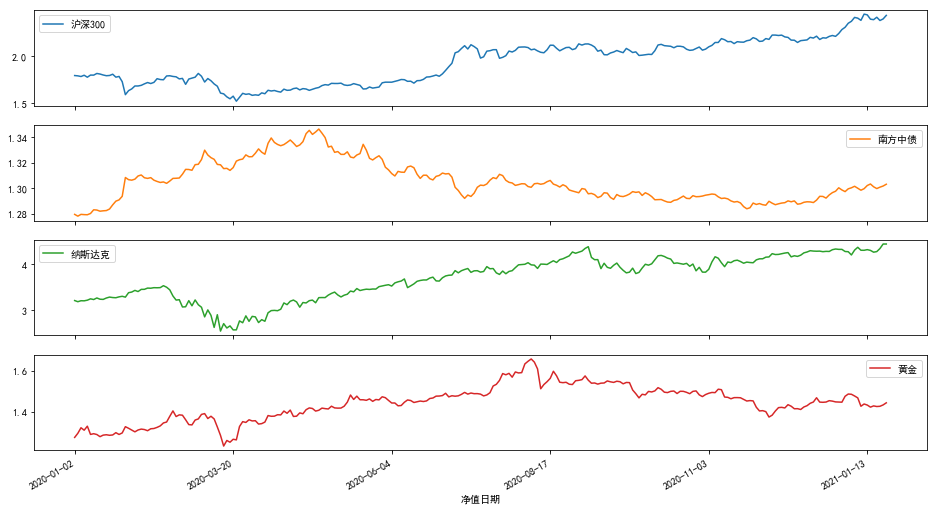

In [300]:
total_assert1.loc[total_assert1.index > '2020-01-01'].plot(figsize=(16, 9), subplots = True)

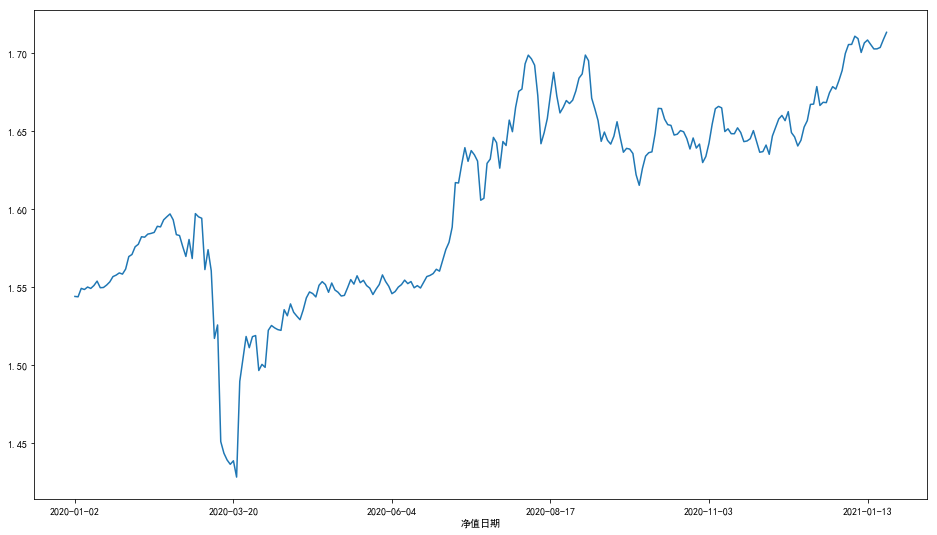

In [305]:
pd.Series(data = s_pnl, index = total_assert1.index).loc[total_assert1.index > '2020-01-01'].plot(figsize=(16, 9))

In [333]:
def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    weights = []
    daily_std = []
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                risk_parity_weight = risk_weight / count
            zuhe_weight = 1
            
            if i > 90:
                # 计算组合年化波动率
                count = 1
                s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                    count += 1
                # print(s_std)
                s_std = s_std / count
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            # cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            cash_weight = cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum()
            if np.abs(cash_weight) < 1e-6:
                cash_weight = 0
            s_weight = np.append(s_weight, cash_weight)
            # print(s_weight.round(2))
            
        # 计算策略逐日风险
        daily_std.append(calc_portfolio_vol(s_weight[0:col], data1.iloc[i-30:i, 0:col].pct_change().cov().values))
        weights.append(s_weight)
    return s_pnl, weights, daily_std

In [334]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert1, 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


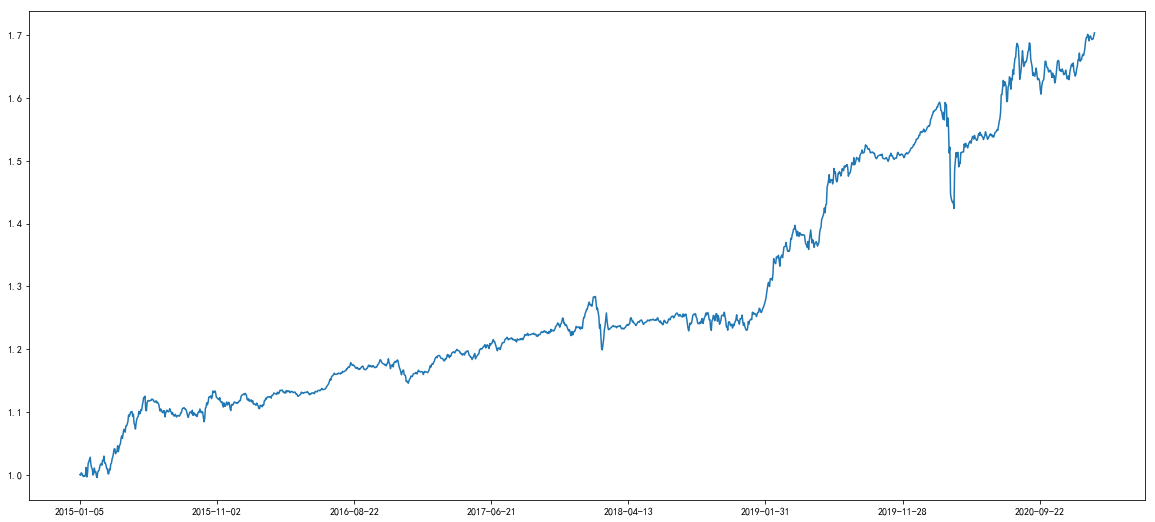

In [335]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(20, 9))

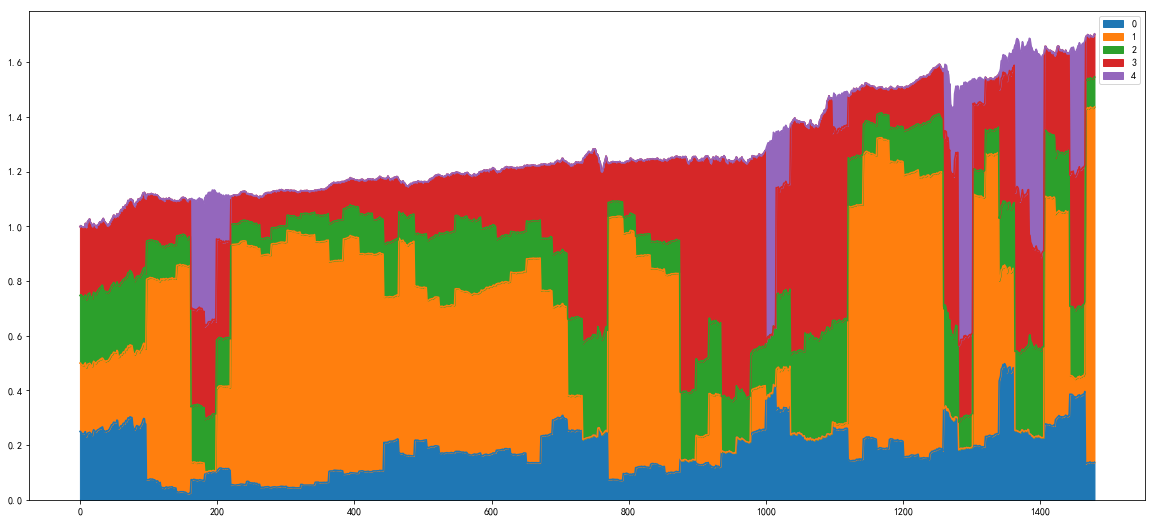

In [336]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [337]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.09416813211554143, 0.10635925817564443, 0.8853778573749521)

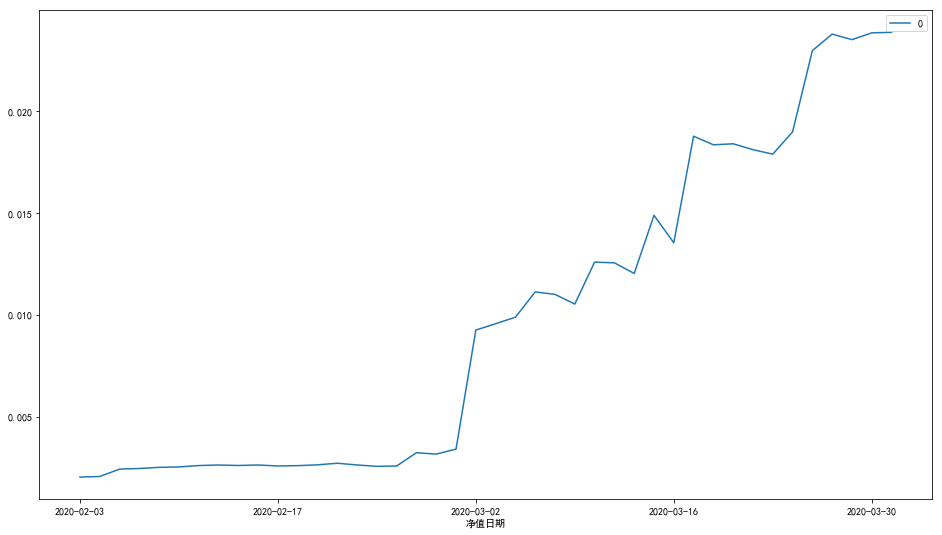

In [354]:
pd.DataFrame(data = daily_std, index = total_assert1.index[1:]).loc[(total_assert1.index[1:]>'2020-02-01') & (total_assert1.index[1:]<'2020-04-01') ].plot(figsize=(16, 9))

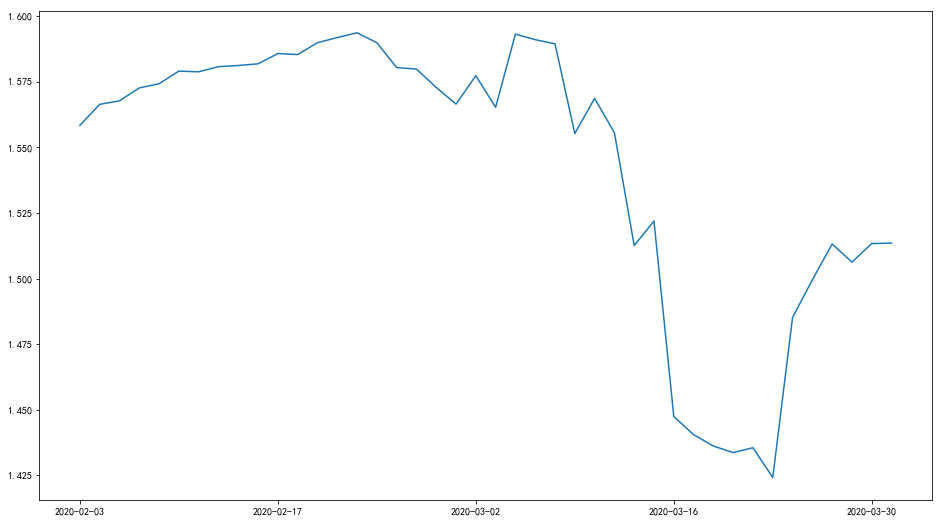

In [356]:
pd.Series(data = s_pnl, index = total_assert.index).loc[(total_assert.index > '2020-02-01') & (total_assert.index < '2020-04-01')].plot(figsize=(16, 9))

In [357]:
汇安多因子C = pd.read_csv('../data/汇安多因子C.csv')

In [358]:
汇安多因子C.head()

净值日期    单位净值    累计净值    日增长率  申购状态  赎回状态  分红送配
0  2021-01-21  2.0138  2.0438   1.49%  开放申购  开放赎回   NaN
1  2021-01-20  1.9843  2.0143   1.58%  开放申购  开放赎回   NaN
2  2021-01-19  1.9535  1.9835  -0.75%  开放申购  开放赎回   NaN
3  2021-01-18  1.9682  1.9982   1.35%  开放申购  开放赎回   NaN
4  2021-01-15  1.9419  1.9719  -0.28%  开放申购  开放赎回   NaN

In [359]:
汇安多因子C = 汇安多因子C.set_index('净值日期').sort_index()

In [379]:
total_assert2 = total_assert1.copy()

In [380]:
total_assert2.head()

沪深300    南方中债   纳斯达克     黄金
净值日期                                    
2015-01-05  1.4501  1.1370  1.357  0.913
2015-01-06  1.4498  1.1370  1.341  0.920
2015-01-07  1.4506  1.1377  1.358  0.922
2015-01-08  1.4167  1.1378  1.384  0.921
2015-01-09  1.4118  1.1374  1.375  0.921

In [381]:
total_assert2 = total_assert2.drop('沪深300', axis = 1)

In [382]:
total_assert2['汇安多因子'] = 汇安多因子C.累计净值

In [383]:
total_assert2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 2015-01-05 to 2021-01-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   南方中债    1481 non-null   float64
 1   纳斯达克    1481 non-null   float64
 2   黄金      1481 non-null   float64
 3   汇安多因子   377 non-null    float64
dtypes: float64(4)
memory usage: 57.9+ KB


In [377]:
total_assert2 = total_assert2.fillna('ffill').dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD80281390>,
      dtype=object)

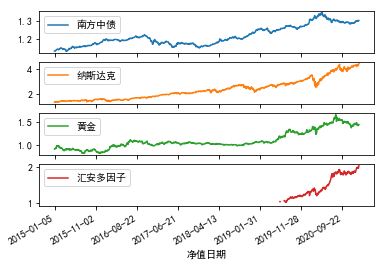

In [384]:
total_assert2.plot(subplots=True)

In [386]:
total_assert2 = total_assert2.dropna()

In [389]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert2, 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


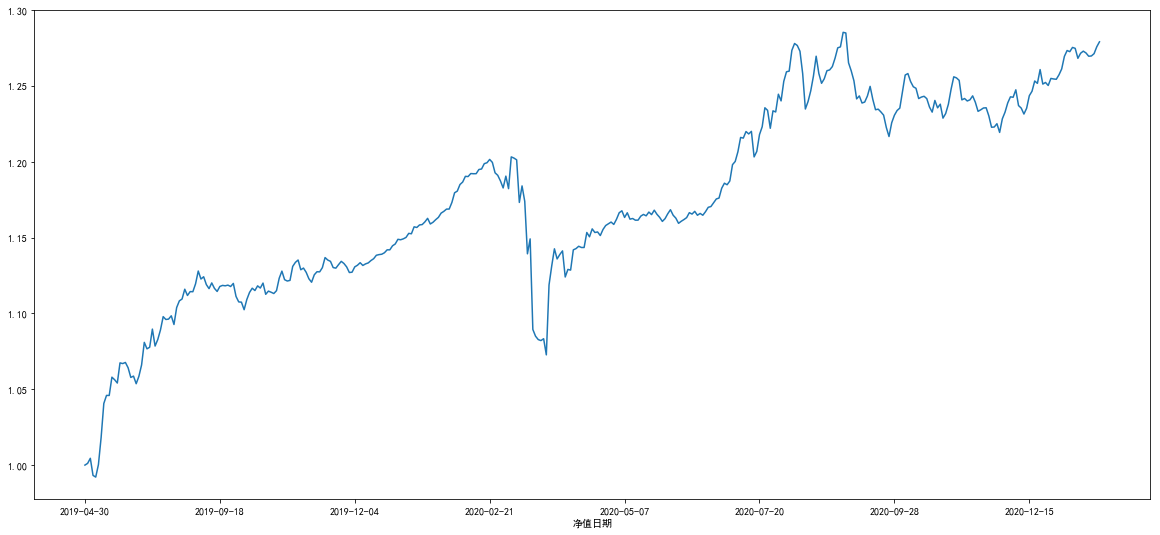

In [391]:
pd.Series(data = s_pnl, index = total_assert2.index).plot(figsize=(20, 9))

In [398]:
total_assert2.head()

南方中债   纳斯达克      黄金   汇安多因子
净值日期                                     
2019-04-30  1.2374  2.733  1.0510  1.0000
2019-05-10  1.2447  2.692  1.0600  1.0051
2019-05-17  1.2482  2.692  1.0774  0.9992
2019-05-24  1.2450  2.624  1.0793  0.9801
2019-05-31  1.2477  2.562  1.0876  0.9887

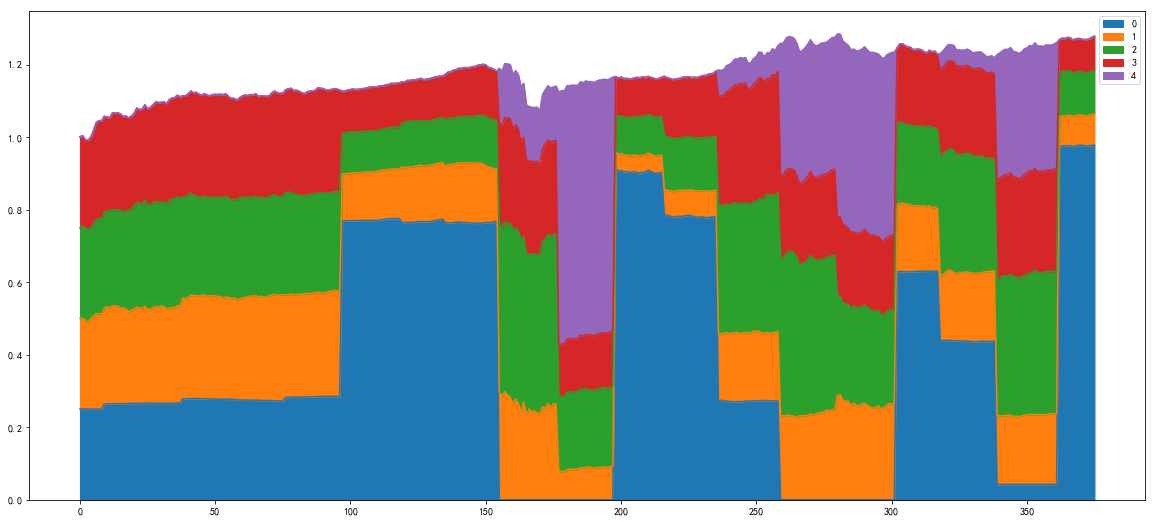

In [392]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [393]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.17735789685254222, 0.10851742219515796, 1.6343725575565313)

In [394]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert1.loc[total_assert1.index > '2019-04-01'], 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [395]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.11066486663780184, 0.10635925817564426, 1.0404817458866362)

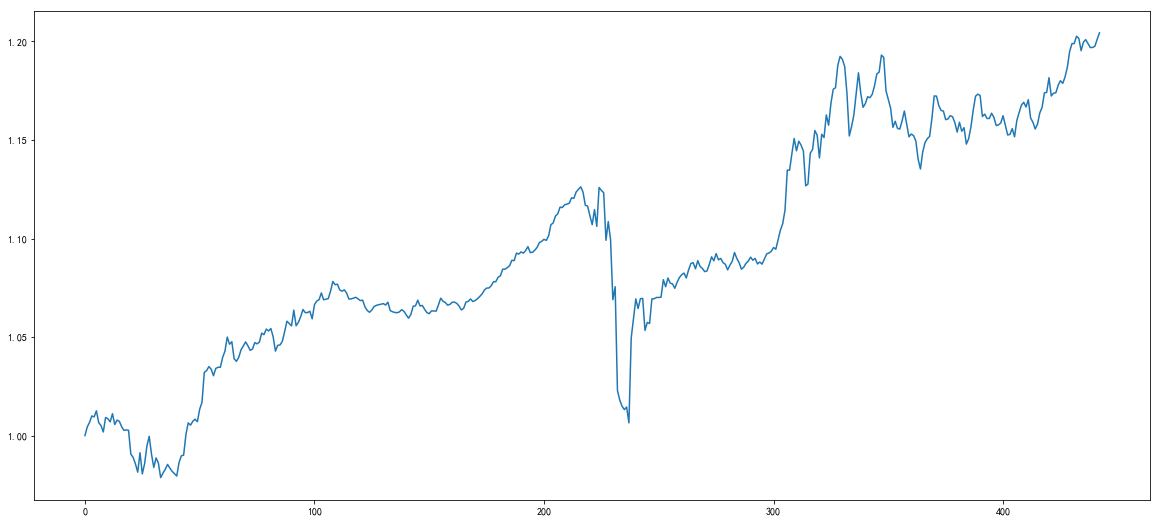

In [397]:
pd.Series(data = s_pnl).plot(figsize=(20, 9))

In [399]:
博时安盈短债C = pd.read_csv('../data/博时安盈短债C.csv')

In [401]:
博时安盈短债C = 博时安盈短债C.set_index('净值日期').sort_index()

In [402]:
pnl = 博时安盈短债C.累计净值.values
(get_annual_return(pnl),
get_max_drawdown(pnl),
get_mar(pnl))

(0.034074203104767165, 0.020905923344947563, 1.6298827151780428)

In [433]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert1, 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [434]:
weights

[array([0.24994828, 0.25      , 0.24705232, 0.25191676, 0.        ]),
 array([0.2500862 , 0.25015391, 0.25018423, 0.2524644 , 0.        ]),
 array([0.24424178, 0.2501759 , 0.25497421, 0.25219058, 0.        ]),
 array([0.24339701, 0.25008795, 0.25331614, 0.25219058, 0.        ]),
 array([0.24108682, 0.25024186, 0.25036846, 0.25520263, 0.        ]),
 array([0.24110406, 0.25074758, 0.24981577, 0.25684556, 0.        ]),
 array([0.24029377, 0.25114336, 0.24871039, 0.25711939, 0.        ]),
 array([0.24729329, 0.25127529, 0.24539425, 0.25465498, 0.        ]),
 array([0.24941383, 0.25169305, 0.24852616, 0.26177437, 0.        ]),
 array([0.23017378, 0.25186895, 0.24852616, 0.26560789, 0.        ]),
 array([0.23300117, 0.25186895, 0.25036846, 0.26588171, 0.        ]),
 array([0.24346597, 0.25197889, 0.2518423 , 0.27026287, 0.        ]),
 array([0.24474174, 0.25217678, 0.25644805, 0.26725082, 0.        ]),
 array([0.24501758, 0.25215479, 0.25718497, 0.26998905, 0.        ]),
 array([0.24725881, 

In [426]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.09416813211554143, 0.10635925817564443, 0.8853778573749521)

In [427]:
s_pnl

array([1.        , 0.99891736, 1.00288875, ..., 1.69462404, 1.69961669,
       1.70425266])

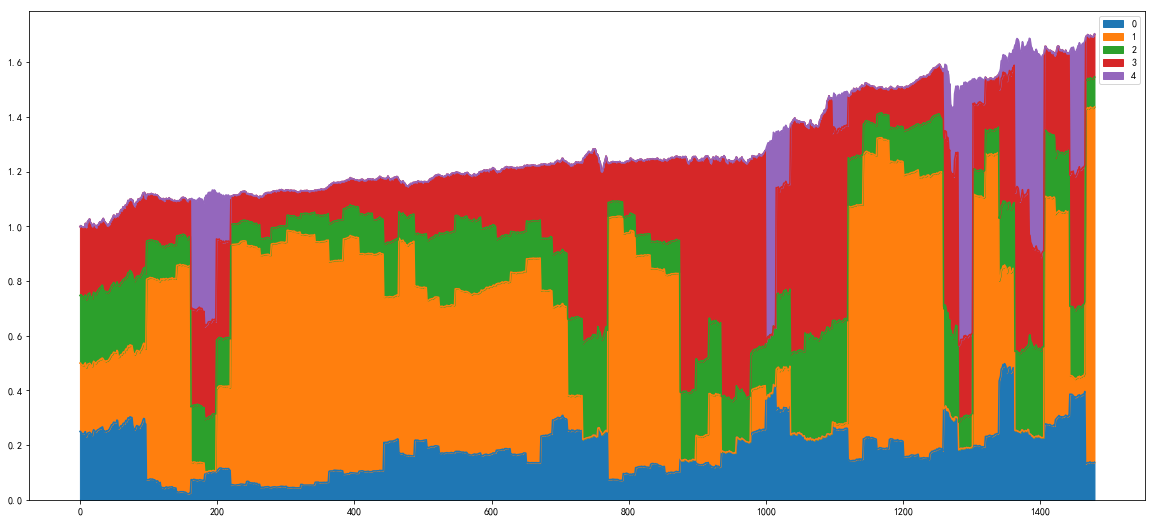

In [428]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [407]:
total_assert3 = total_assert1.copy()

In [408]:
total_assert3.head()

沪深300    南方中债   纳斯达克     黄金
净值日期                                    
2015-01-05  1.4501  1.1370  1.357  0.913
2015-01-06  1.4498  1.1370  1.341  0.920
2015-01-07  1.4506  1.1377  1.358  0.922
2015-01-08  1.4167  1.1378  1.384  0.921
2015-01-09  1.4118  1.1374  1.375  0.921

In [413]:
total_assert3 = total_assert3.drop('南方中债', axis = 1)

In [414]:
total_assert3.head()

沪深300   纳斯达克     黄金
净值日期                            
2015-01-05  1.4501  1.357  0.913
2015-01-06  1.4498  1.341  0.920
2015-01-07  1.4506  1.358  0.922
2015-01-08  1.4167  1.384  0.921
2015-01-09  1.4118  1.375  0.921

In [415]:
total_assert3['短债'] = 博时安盈短债C.累计净值

In [416]:
total_assert3.head()

沪深300   纳斯达克     黄金     短债
净值日期                                   
2015-01-05  1.4501  1.357  0.913  1.053
2015-01-06  1.4498  1.341  0.920  1.054
2015-01-07  1.4506  1.358  0.922  1.054
2015-01-08  1.4167  1.384  0.921  1.054
2015-01-09  1.4118  1.375  0.921  1.055

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD83DB75C0>,
      dtype=object)

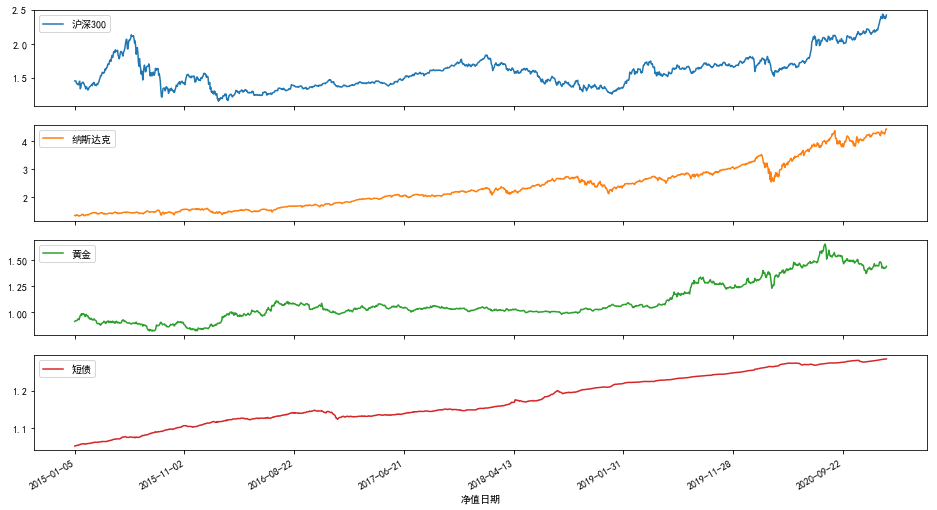

In [418]:
total_assert3.plot(subplots=True, figsize=(16, 9))

In [459]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert3, 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [460]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.08317848951529294, 0.10608346456478189, 0.7840853412597437)

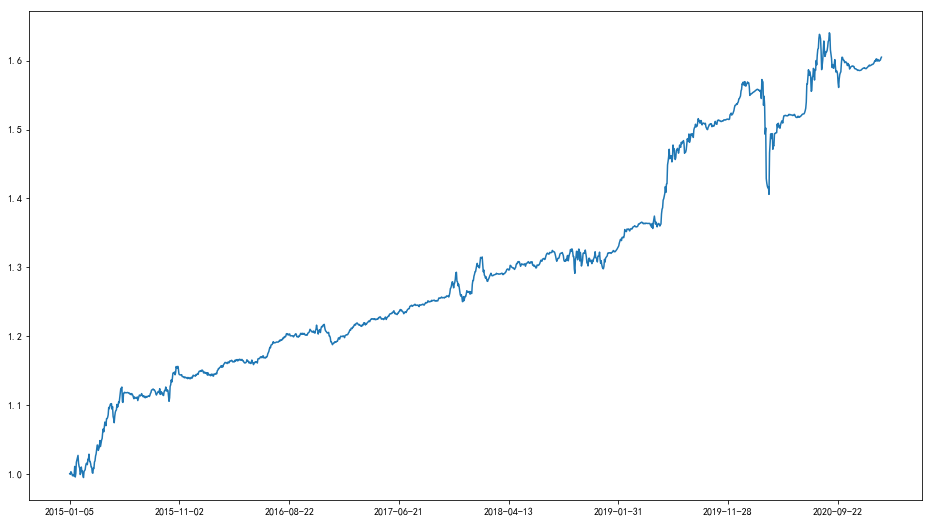

In [448]:
pd.Series(data = s_pnl, index = total_assert.index).plot(figsize=(16, 9))

In [462]:
x = pd.Series(data = s_pnl, index = total_assert.index)

In [463]:
x.loc[(x.index>'2018-01-01') & (x.index < '2019-01-01')]

2018-01-02    1.275134
2018-01-03    1.280831
2018-01-04    1.280852
2018-01-05    1.287115
2018-01-08    1.289789
                ...   
2018-12-25    1.301126
2018-12-26    1.311476
2018-12-27    1.307560
2018-12-28    1.313297
2018-12-31    1.314480
Length: 245, dtype: float64

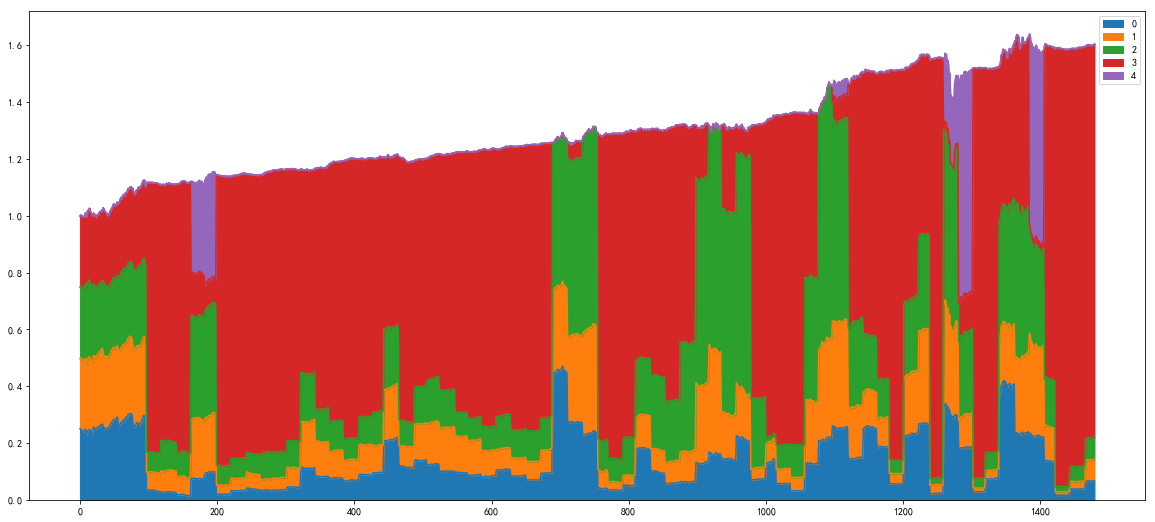

In [423]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [437]:
total_assert4 = total_assert2.copy()

In [438]:
total_assert4.head()

南方中债   纳斯达克      黄金   汇安多因子
净值日期                                     
2019-04-30  1.2374  2.733  1.0510  1.0000
2019-05-10  1.2447  2.692  1.0600  1.0051
2019-05-17  1.2482  2.692  1.0774  0.9992
2019-05-24  1.2450  2.624  1.0793  0.9801
2019-05-31  1.2477  2.562  1.0876  0.9887

In [440]:
total_assert4.drop('南方中债', axis = 1)['短债'] = 博时安盈短债C.累计净值

In [442]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert4, 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


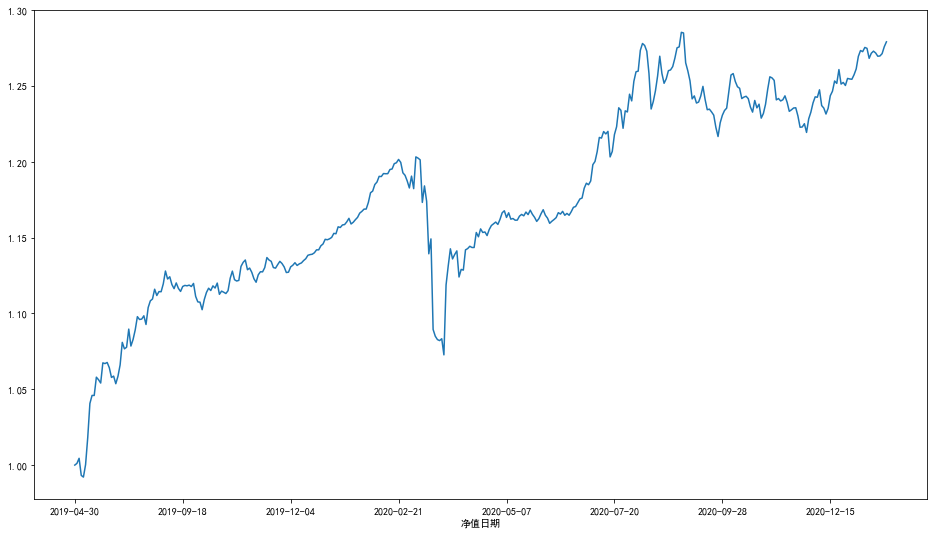

In [444]:
pd.Series(data = s_pnl, index = total_assert4.index).plot(figsize=(16, 9))

In [445]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.17735789685254222, 0.10851742219515796, 1.6343725575565313)

In [451]:
total_assert1.head()

沪深300    南方中债   纳斯达克     黄金
净值日期                                    
2015-01-05  1.4501  1.1370  1.357  0.913
2015-01-06  1.4498  1.1370  1.341  0.920
2015-01-07  1.4506  1.1377  1.358  0.922
2015-01-08  1.4167  1.1378  1.384  0.921
2015-01-09  1.4118  1.1374  1.375  0.921

In [452]:
total_assert5 = total_assert1.copy()

In [453]:
total_assert5['短债'] = 博时安盈短债C.累计净值

In [454]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert5, 0.08)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


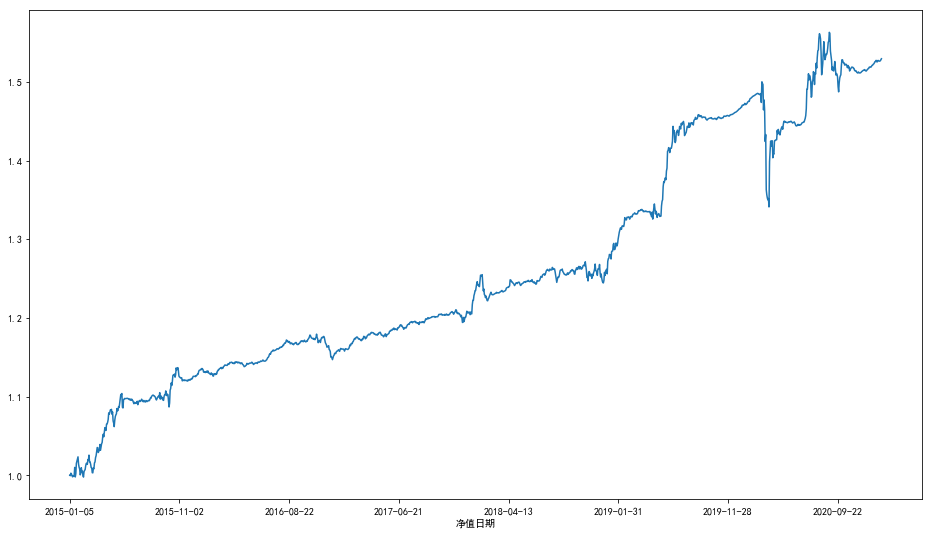

In [456]:
pd.Series(data = s_pnl, index = total_assert5.index).plot(figsize=(16, 9))

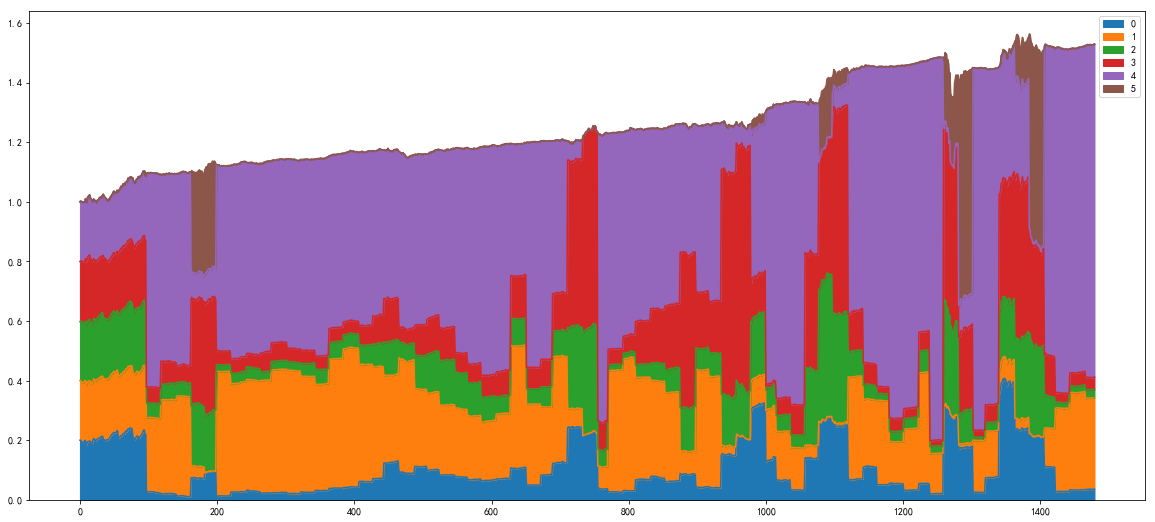

In [457]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [458]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.07437854774373176, 0.10608281003201468, 0.7011366659808983)

In [559]:
def risk_parity_strategy(data:pd.DataFrame, target_year_vol = 0.08):
    row, col = data.shape
    data1 = data.copy()
    data1['cash'] = 1
    
    s_pnl = np.array([])
    s_weight = np.array([1.0/col] * col)
    s_weight = np.append(s_weight, 0)
    weights = []
    daily_std = []
    
    for i in np.arange(row):
        if i == 0:
            s_pnl = np.append(s_pnl, 1)
            continue
        else:
            y_md = data1.values[i-1, ]
            t_md = data1.values[i, ]
            
            simple_return = t_md / y_md
            
            s_weight = s_weight * simple_return
            s_pnl = np.append(s_pnl, s_weight.sum())
        
        yd = data1.index[i-1]
        td = data1.index[i]
        if is_balance_day(td, yd):
            cur_pnl = s_pnl[-1]
            
            risk_parity_weight = np.array([1.0/col] * col)
            
            if i > 80:
                count = 1
                risk_weight = calc_equal_risk_contributions_weights(data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    count = count + 1
                    risk_weight = risk_weight + calc_equal_risk_contributions_weights(data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                risk_parity_weight = risk_weight / count
                # print(risk_parity_weight)
            zuhe_weight = 1
            
            if i > 90:
                # 计算组合年化波动率
                count = 1
                s_std = calc_portfolio_vol(risk_parity_weight, data1.iloc[i-30:i, 0:col].pct_change().cov().values)
                for period in range(40, 70, 2):
                    s_std += calc_portfolio_vol(risk_parity_weight, data1.iloc[i-period:i, 0:col].pct_change().cov().values)
                    count += 1
                # print(s_std)
                s_std = s_std / count
                year_vol = s_std * np.sqrt(250)
                if np.abs(year_vol) > 1e-6:
                    zuhe_weight = target_year_vol / year_vol
                if zuhe_weight > 1.0:
                    zuhe_weight = 1.0
            
            old_weight = s_weight.copy()
            new_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            new_weight = np.append(new_weight, cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum())
            
            commission = np.nansum(np.abs(new_weight - old_weight)) * 1 / 10000.0
            # cur_pnl = cur_pnl - commission
            
            # 再次计算仓位
            s_weight = np.array(risk_parity_weight * zuhe_weight * cur_pnl)
            cash_weight = cur_pnl - (risk_parity_weight * zuhe_weight * cur_pnl).sum()
            if np.abs(cash_weight) < 1e-6:
                cash_weight = 0
            s_weight = np.append(s_weight, cash_weight)
            # print('result:', s_weight.round(2))
            
        # 计算策略逐日风险
        daily_std.append(calc_portfolio_vol(s_weight[0:col], data1.iloc[i-30:i, 0:col].pct_change().cov().values))
        weights.append(s_weight)
    return s_pnl, weights, daily_std

In [468]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert3)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


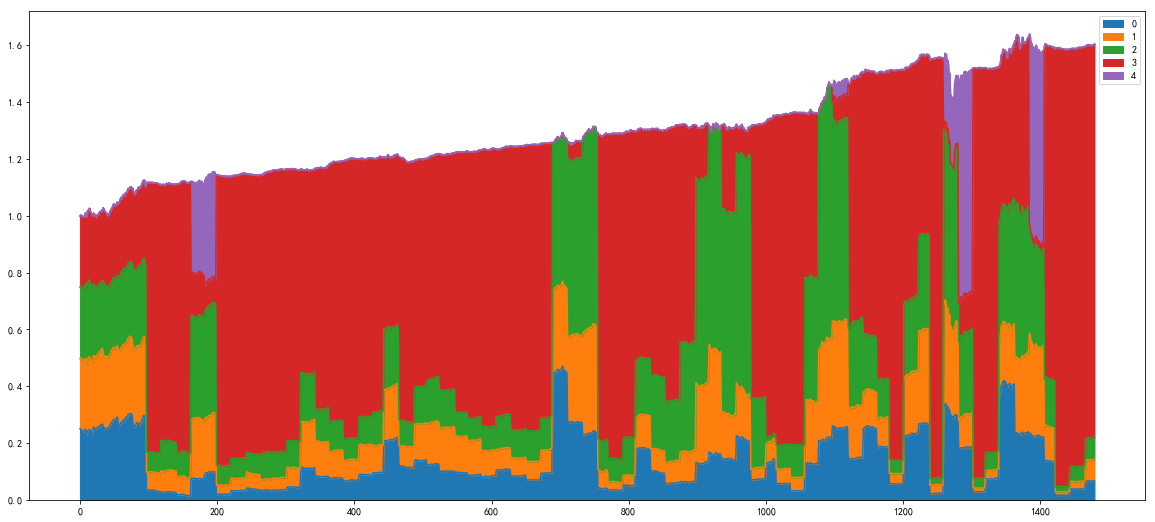

In [470]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

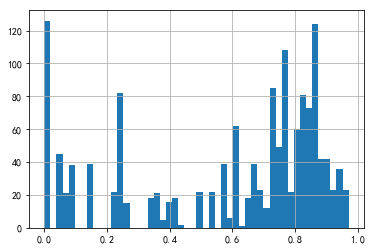

In [480]:
(pd.DataFrame(weights).iloc[:, 3] / pd.DataFrame(weights).sum(axis = 1)).hist(bins=50)

In [476]:
pd.DataFrame(weights).sum(axis = 1)

0       0.999155
1       1.002972
2       1.001644
3       0.999379
4       0.997133
          ...   
1475    1.599669
1476    1.600763
1477    1.601016
1478    1.603633
1479    1.605325
Length: 1480, dtype: float64

In [607]:
def calc_target_risk_contributions_weights(target_risk, cov):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    n = cov.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    duanzhai_less_0_75 = {
        'type': 'ineq',
        'fun': lambda weights: -weights[2] + 0.65
    }
    
    def msd_risk(weights, target_risk, cov):
        """
        Returns the Mean Squared Difference in risk contributions
        between weights and target_risk
        """
        w_contribs = calc_portfolio_risk_contribution(weights, cov)
        return ((w_contribs-target_risk)**2).sum()
    
    weights = minimize(msd_risk, init_guess,
                       args=(target_risk, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1, duanzhai_less_0_75),
                       bounds=bounds)
    return weights.x

In [566]:
weight = calc_target_risk_contributions_weights(np.array([1.0/4.0] * 4), total_assert3.pct_change().cov().values)

In [567]:
(weight, weight.sum())

(array([0.07265652, 0.07899047, 0.148353  , 0.7       ]), 1.0)

In [568]:
def calc_equal_risk_contributions_weights(cov):
    """
    Returns the weights of the portfolio that equalizes the contributions
    of the constituents based on the given covariance matrix
    """
    n = cov.shape[0]
    return calc_target_risk_contributions_weights(target_risk=np.repeat(1/n,n), cov=cov)

In [549]:
calc_equal_risk_contributions_weights(total_assert3.pct_change().cov().values)

array([0.06047464, 0.06572917, 0.12379619, 0.75      ])

In [585]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert3)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


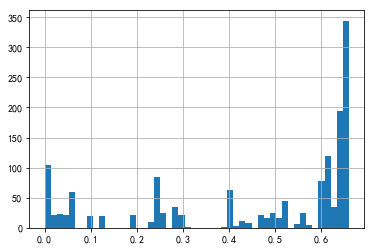

In [586]:
(pd.DataFrame(weights).iloc[:, 3] / pd.DataFrame(weights).sum(axis = 1)).hist(bins=50)

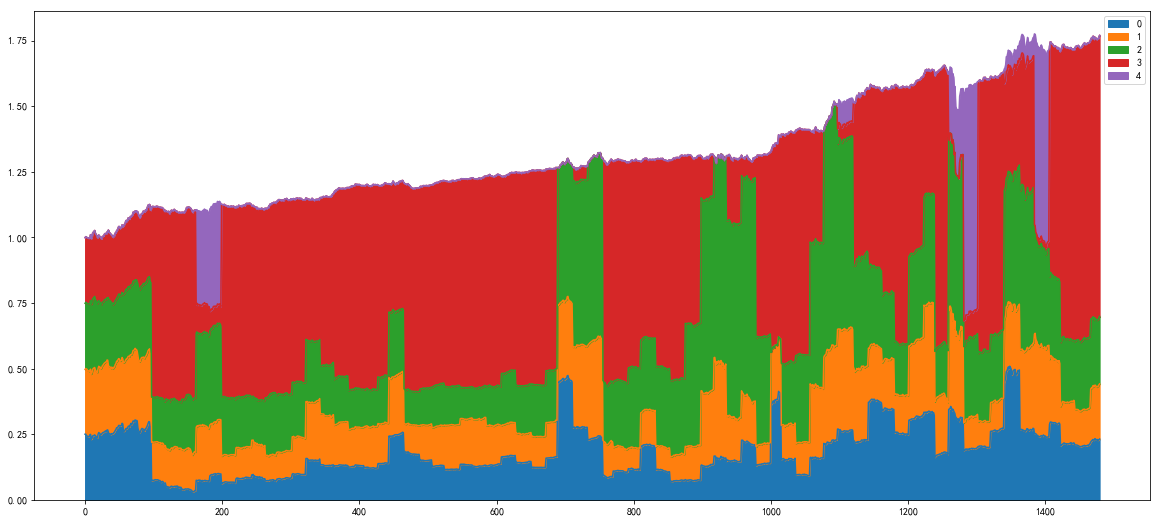

In [587]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

In [588]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.10121271766861084, 0.10971438602011588, 0.922510906181927)

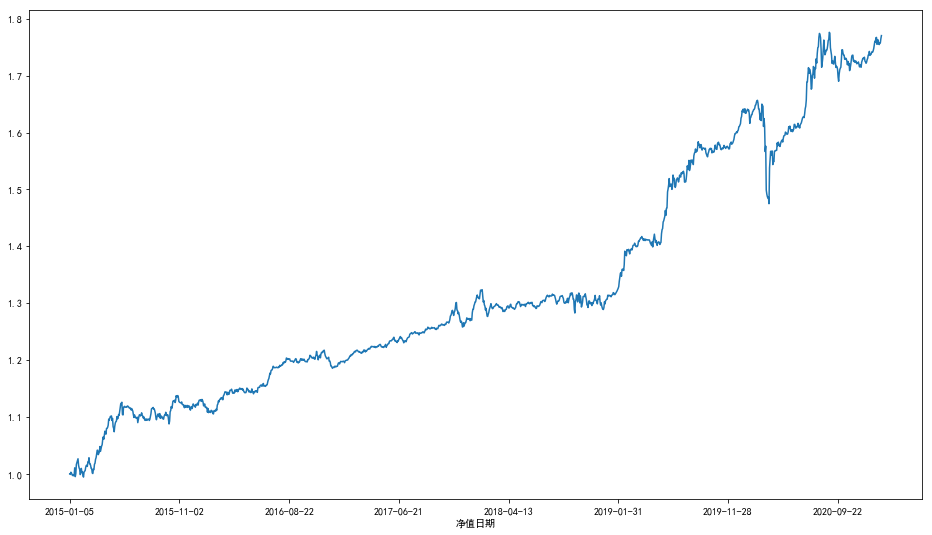

In [589]:
pd.Series(data = s_pnl, index = total_assert3.index).plot(figsize=(16, 9))

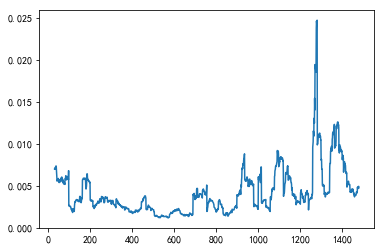

In [590]:
plt.plot(daily_std)

In [659]:
x = pd.Series(data = s_pnl, index = pd.to_datetime(total_assert3.index))

In [660]:
x['2016']

净值日期
2016-01-04    1.116669
2016-01-05    1.118118
2016-01-06    1.120086
2016-01-07    1.114331
2016-01-08    1.115337
                ...   
2016-12-27    1.177784
2016-12-28    1.176356
2016-12-29    1.177169
2016-12-30    1.177594
2016-12-31    1.177594
Length: 245, dtype: float64

In [661]:
x['2017']

净值日期
2017-01-03    1.181032
2017-01-04    1.183545
2017-01-05    1.183058
2017-01-06    1.181701
2017-01-09    1.184260
                ...   
2017-12-26    1.253391
2017-12-27    1.252076
2017-12-28    1.253613
2017-12-29    1.253165
2017-12-31    1.253158
Length: 245, dtype: float64

In [662]:
x['2018']

净值日期
2018-01-02    1.259347
2018-01-03    1.262029
2018-01-04    1.262030
2018-01-05    1.264210
2018-01-08    1.265836
                ...   
2018-12-25    1.246797
2018-12-26    1.256649
2018-12-27    1.256117
2018-12-28    1.258090
2018-12-31    1.259595
Length: 245, dtype: float64

In [663]:
x['2019']

净值日期
2019-01-02    1.257979
2019-01-03    1.252074
2019-01-04    1.267843
2019-01-07    1.271176
2019-01-08    1.271716
                ...   
2019-12-25    1.526729
2019-12-26    1.530131
2019-12-27    1.530550
2019-12-30    1.532192
2019-12-31    1.533605
Length: 245, dtype: float64

In [664]:
x['2020']

净值日期
2020-01-02    1.539361
2020-01-03    1.541143
2020-01-06    1.547422
2020-01-07    1.546594
2020-01-08    1.549273
                ...   
2020-12-25    1.651878
2020-12-28    1.653835
2020-12-29    1.652889
2020-12-30    1.655270
2020-12-31    1.659119
Length: 243, dtype: float64

In [665]:
x['2015']

净值日期
2015-01-05    1.000000
2015-01-06    0.999155
2015-01-07    1.002972
2015-01-08    1.001644
2015-01-09    0.999379
                ...   
2015-12-25    1.127307
2015-12-28    1.124550
2015-12-29    1.127963
2015-12-30    1.126631
2015-12-31    1.123319
Length: 244, dtype: float64

In [599]:
total_assert4 = total_assert4.drop('南方中债', axis = 1)
total_assert4['短债'] = 博时安盈短债C.累计净值

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD8B706080>,
      dtype=object)

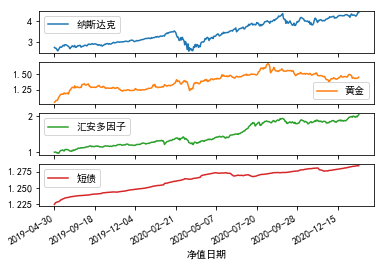

In [600]:
total_assert4.plot(subplots=True)

In [601]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert4)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


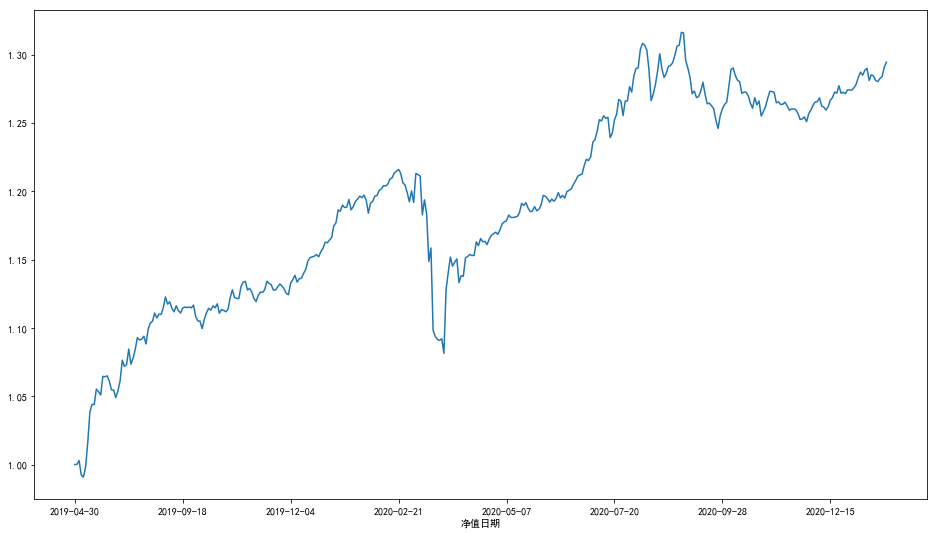

In [603]:
pd.Series(data = s_pnl, index = total_assert4.index).plot(figsize=(16, 9))

In [604]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.18663476523183653, 0.11067996810463021, 1.686256044593392)

In [608]:
total_assert3

沪深300   纳斯达克      黄金      短债
净值日期                                     
2015-01-05  1.4501  1.357  0.9130  1.0530
2015-01-06  1.4498  1.341  0.9200  1.0540
2015-01-07  1.4506  1.358  0.9220  1.0540
2015-01-08  1.4167  1.384  0.9210  1.0540
2015-01-09  1.4118  1.375  0.9210  1.0550
...            ...    ...     ...     ...
2021-01-15  2.3767  4.258  1.4284  1.2837
2021-01-18  2.4022  4.271  1.4254  1.2840
2021-01-19  2.3679  4.337  1.4265  1.2840
2021-01-20  2.3843  4.435  1.4332  1.2841
2021-01-21  2.4218  4.435  1.4434  1.2842

[1481 rows x 4 columns]

In [609]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert3.drop('黄金', axis = 1))

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


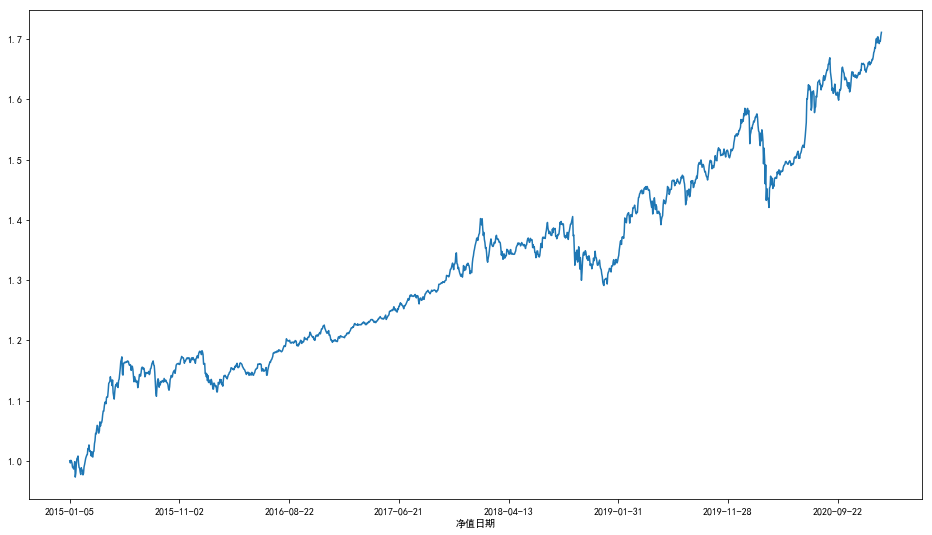

In [610]:
pd.Series(data = s_pnl, index = total_assert3.index).plot(figsize=(16, 9))

In [611]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.09491658722894059, 0.103871954687501, 0.9137845486252506)

In [690]:
def calc_target_risk_contributions_weights(target_risk, cov):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    n = cov.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    huangjin_less_0_15 = {
         'type': 'ineq',
        'fun': lambda weights: -weights[2] + 0.2
    }
    
    duanzhai_less_0_75 = {
        'type': 'ineq',
        'fun': lambda weights: -weights[3] + 0.65
    }
    
    def msd_risk(weights, target_risk, cov):
        """
        Returns the Mean Squared Difference in risk contributions
        between weights and target_risk
        """
        w_contribs = calc_portfolio_risk_contribution(weights, cov)
        return ((w_contribs-target_risk)**2).sum()
    
    weights = minimize(msd_risk, init_guess,
                       args=(target_risk, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1, duanzhai_less_0_75, huangjin_less_0_15),
                       bounds=bounds)
    return weights.x

In [691]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert3)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


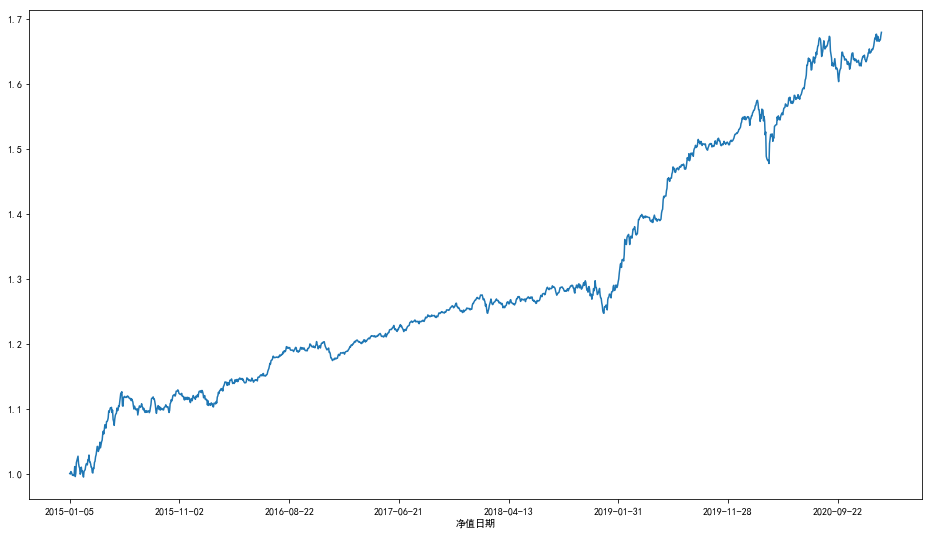

In [692]:
pd.Series(data = s_pnl, index = total_assert3.index).plot(figsize=(16, 9))

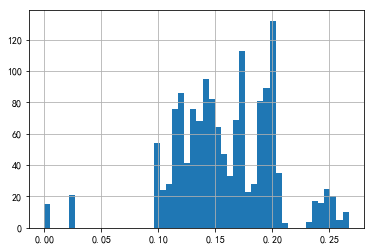

In [693]:
(pd.DataFrame(weights).iloc[:, 2] / pd.DataFrame(weights).sum(axis = 1)).hist(bins=50)

In [694]:
total_assert3.head(1)

沪深300   纳斯达克     黄金     短债
净值日期                                   
2015-01-05  1.4501  1.357  0.913  1.053

In [695]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.09149179031601817, 0.06182333125570211, 1.479890980600947)

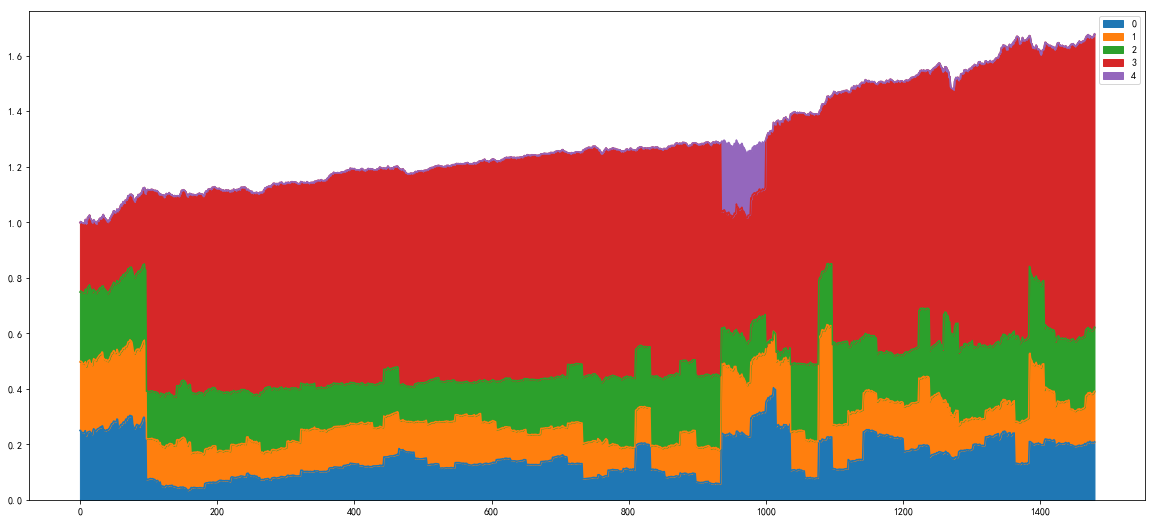

In [696]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

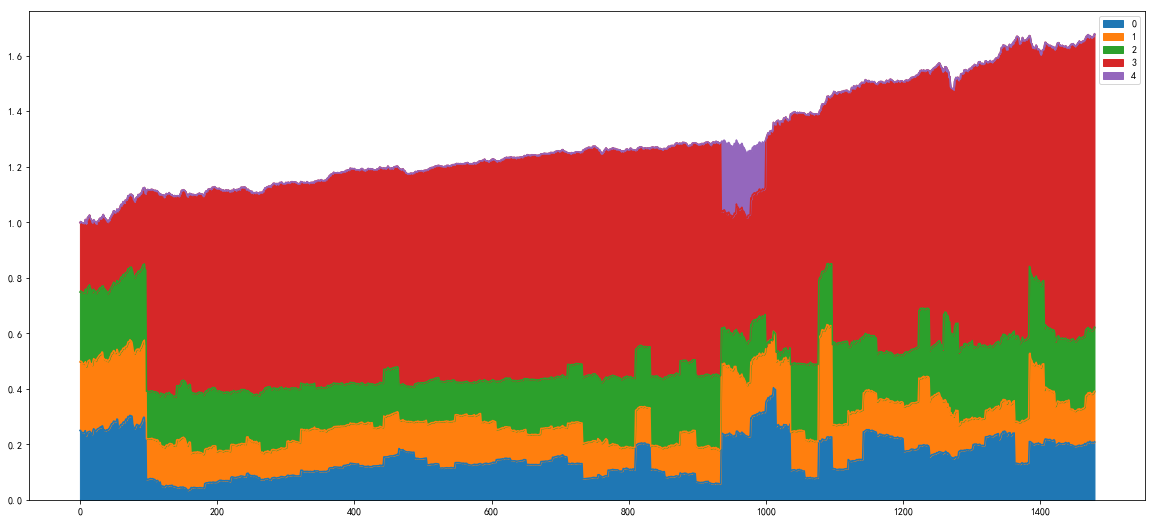

In [697]:
pd.DataFrame(weights).plot.area(figsize = (20, 9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD91054550>,
      dtype=object)

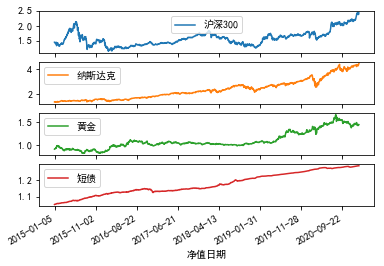

In [688]:
total_assert3.plot(subplots=True)

In [700]:
total_assert6 = pd.concat([total_assert4.纳斯达克, total_assert4.汇安多因子, total_assert4.黄金, total_assert4.短债], axis = 1)

In [701]:
s_pnl, weights, daily_std = risk_parity_strategy(total_assert6)

G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\program-files\anaconda3_5\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
G:\program-files\anaconda3_5\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
G:\program-files\anaconda3_5\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


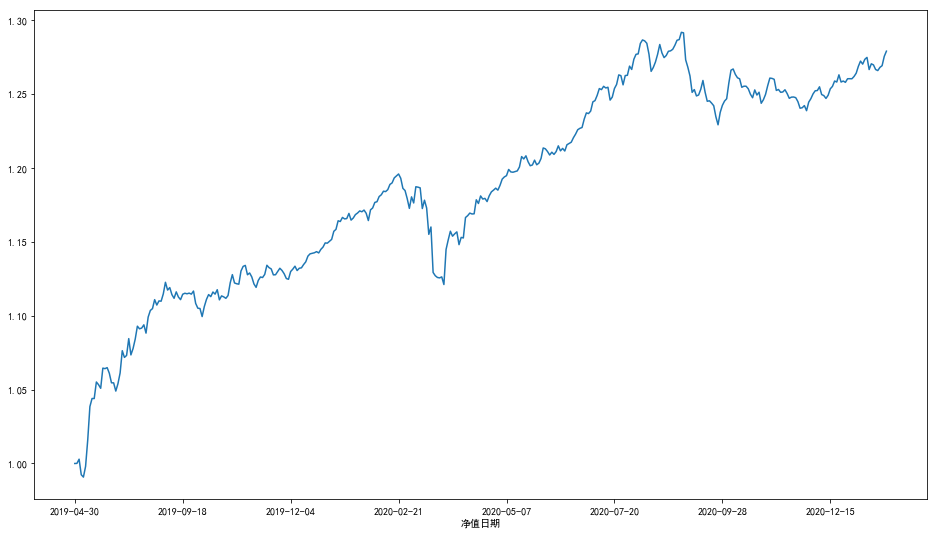

In [702]:
pd.Series(data = s_pnl, index = total_assert6.index).plot(figsize=(16, 9))

In [703]:
(get_annual_return(s_pnl),
get_max_drawdown(s_pnl),
get_mar(s_pnl))

(0.17725162294289754, 0.06254415127942593, 2.8340239545500867)